Mounted at /content/drive
Python 3.10.12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 858.3/858.3 kB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for networkx: filename=networkx-2.2-py2.py3-none-any.whl size=1526911 sha256=00df7ca5aa965e

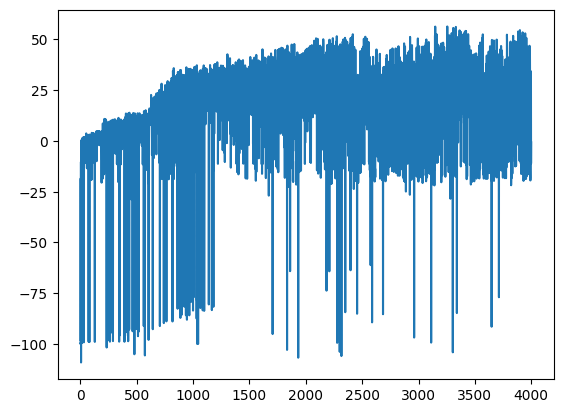

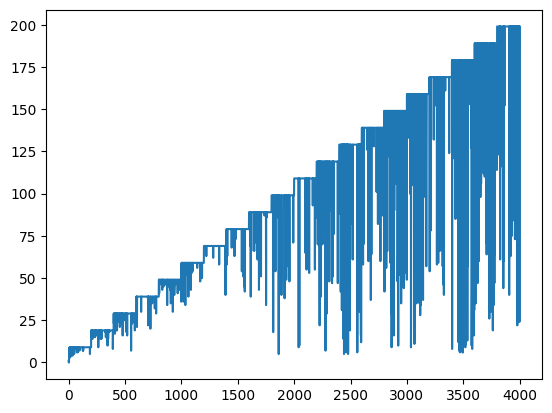

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environmenttt.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

!python3 --version
!pip install pybullet
!pip install gymnasium
!pip install urdfpy
########################

import numpy as np
import random
import pybullet as p
from environmenttt import Env
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import math
import time

start_time = time.time()

cwd = os.getcwd() # Get the current working directory (cwd)
files = os.listdir(cwd) # Get all the files in that directory

global lr
lr=0.1
global df
df=0.9
global eps
eps=0.0005
global number_of_steps
number_of_steps = 4000

reward=0



class QLearningAgent:
    def __init__(self, actions):
        # actions = [0, 1, 2, 3]
        global lr
        global df
        global eps
        self.actions = actions
        self.learning_rate = lr #was 0.01
        self.discount_factor = df #was 0.9
        self.epsilon = eps# was 0.1
        self.q_table = defaultdict(lambda: [10.0, 10.0, 10.0, 10.0])
        global qarr
        qarr=self.q_table

    # update q function with sample <s, a, r, s'>
    def learn(self, state, action, reward, next_state):
        current_q = self.q_table[state][action]
        # using Bellman Optimality Equation to update q function
        new_q = reward + self.discount_factor * max(self.q_table[next_state])
        self.q_table[state][action] += self.learning_rate * (new_q - current_q)
        global qarr
        qarr=self.q_table
        #print(self.q_table)

    # get action for the state according to the q function table
    # agent pick action of epsilon-greedy policy
    def get_action(self, state):
        global number_of_steps

        #self.epsilon=self.epsilon*0.99995
        if np.random.rand() < self.epsilon:
            # take random action
            if episode<number_of_steps/2 or trial>50:
              action = np.random.choice(self.actions)
            else:

              state_action = self.q_table[state]
              action = self.arg_max(state_action)
        else:
            # take action according to the q function table
            state_action = self.q_table[state]
            action = self.arg_max(state_action)
        return action

    @staticmethod
    def arg_max(state_action):
        max_index_list = []
        max_value = state_action[0]
        for index, value in enumerate(state_action):
            if value > max_value:
                max_index_list.clear()
                max_value = value
                max_index_list.append(index)
            elif value == max_value:
                max_index_list.append(index)
        return random.choice(max_index_list)

    def q_table(self):
        print(self.q_table)



if __name__ == "__main__":
    env = Env()
    agent = QLearningAgent(actions=list(range(env.n_actions)))

    global qarr
    print(qarr)

    episode_plot=[]
    reward_sum_plot=[]
    trial_plot=[]

    for episode in range(number_of_steps):
        state = env.reset()

        if episode%200==0:
            print("Q_table")
            print(qarr)


        #global number_of_steps
        n=(episode//200)*10+10
        if episode%200==0:
          print(n)
        for trial in range(n):
            env.render()

            # take action and proceed one step in the environment
            action = agent.get_action(str(state))
            next_state, reward, done, reward_sum = env.step(action)

            # with sample <s,a,r,s'>, agent learns new q function
            agent.learn(str(state), action, reward, str(next_state))

            state = next_state
            #env.print_value_all(agent.q_table)

            if trial==n-1:
                done=True

            # if episode ends, then break
            if done:

                #print("episode:", episode, "   trials completed:", trial, "    reward:", reward_sum)

                episode_plot=np.concatenate((episode_plot, [episode]))
                reward_sum_plot = np.concatenate((reward_sum_plot, [reward_sum]))
                trial_plot = np.concatenate((trial_plot, [trial]))


                break





f=plt.figure(1)
plt.plot(episode_plot, reward_sum_plot)
f.show()

g=plt.figure(2)
plt.plot(episode_plot, trial_plot)
g.show()

data_array = np.vstack((episode_plot, reward_sum_plot, trial_plot))

import csv

# field names
#fields = ['Episode', 'Reward', 'Trials']

# data rows of csv file
rows = data_array

# name of csv file
#filename = "university_records.csv"
filename = '/content/drive/My Drive/ColabNotebooks/5qlearning/CSVs/RP3_'+str(lr)+'_'+str(df)+'_'+str(eps)+'_'+str(number_of_steps)+'.csv'
print(filename)

# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)

    # writing the fields
    #csvwriter.writerow(fields)

    # writing the data rows
    csvwriter.writerows(rows)
#agent.q_table()
print((time.time() - start_time))
#plt.pause(0)

Mounted at /content/drive
Python 3.10.12
defaultdict(<function QLearningAgent.__init__.<locals>.<lambda> at 0x7f1be7586c20>, {'None': [4.073679780830464, -0.10000000000000142, -9.190000000000003, -9.190000000000003], "[7, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[6, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[7, 0, '1111']": [2.4734625046298637, -0.10000000000000142, 4.165928556459782, 2.8465169213348025], "[6, 0, '1110']": [3.3872954816608503, -0.10000000000000142, 3.945651144417764, 4.088565298357456], "[7, 0, '1101']": [4.8361449975245785, -0.10000000000000142, 5.75986266528548, 5.765056682440052], "[6, 1, '0011']": [4.870276714755987, 4.2563775125867185, 3.744101119816971, 3.7476416607397347], "[7, 1, '0011']": [6.794013157831258, 6.5510746482450015, 6.561978863254086, 5.3936689777947056], "[7, 2, '0011']": [7.75289532367467, 6.3888491991501, 6.685451915236032, 6.73289], "[8, 2, '1101']": [6.215995161368455, 6.24378041172691, 6.292351183208487, 5.166522286269413], "[8, 3, '0011']": [

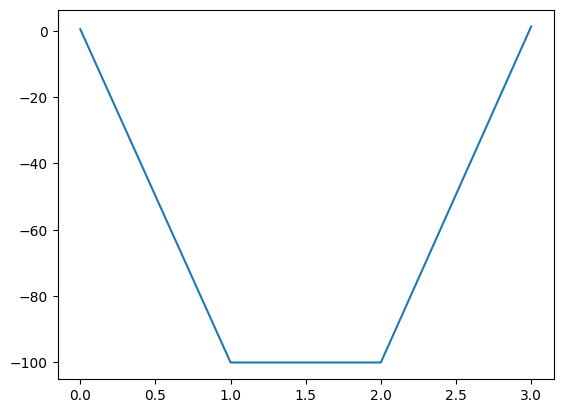

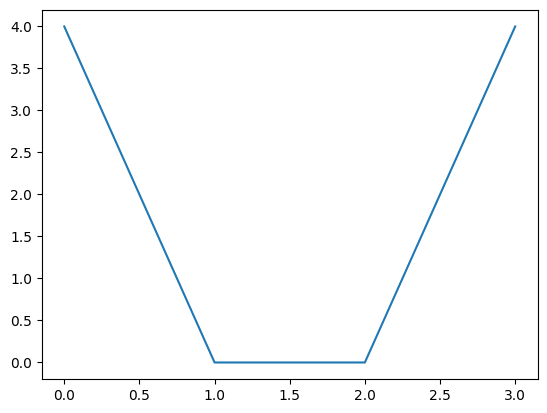

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environmenttt.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

!python3 --version
!pip install pybullet
!pip install gymnasium
!pip install urdfpy
########################

import numpy as np
import random
import pybullet as p
from environmenttt import Env
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import math
import time

start_time = time.time()

cwd = os.getcwd() # Get the current working directory (cwd)
files = os.listdir(cwd) # Get all the files in that directory

global lr
lr=0.1
global df
df=0.9
global eps
eps=0.5
global number_of_steps
number_of_steps = 4

reward=0



class QLearningAgent:
    def __init__(self, actions):
        # actions = [0, 1, 2, 3]
        global lr
        global df
        global eps
        self.actions = actions
        self.learning_rate = lr #was 0.01
        self.discount_factor = df #was 0.9
        self.epsilon = eps# was 0.1
        prevq={'None': [4.073679780830464, -0.10000000000000142, -9.190000000000003, -9.190000000000003], "[7, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[6, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[7, 0, '1111']": [2.4734625046298637, -0.10000000000000142, 4.165928556459782, 2.8465169213348025], "[6, 0, '1110']": [3.3872954816608503, -0.10000000000000142, 3.945651144417764, 4.088565298357456], "[7, 0, '1101']": [4.8361449975245785, -0.10000000000000142, 5.75986266528548, 5.765056682440052], "[6, 1, '0011']": [4.870276714755987, 4.2563775125867185, 3.744101119816971, 3.7476416607397347], "[7, 1, '0011']": [6.794013157831258, 6.5510746482450015, 6.561978863254086, 5.3936689777947056], "[7, 2, '0011']": [7.75289532367467, 6.3888491991501, 6.685451915236032, 6.73289], "[8, 2, '1101']": [6.215995161368455, 6.24378041172691, 6.292351183208487, 5.166522286269413], "[8, 3, '0011']": [7.0405055947017905, 6.988394406024524, 7.068049145462769, 7.151884395575418], "[6, 1, '1111']": [8.939516204584073, 9.20602722929244, 9.48805580557066, 9.545090411068719], "[5, 0, '1110']": [5.0963155081951745, -0.10000000000000142, 3.8241072696314387, 3.8017441305045367], "[5, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[6, 0, '1100']": [2.827492238811561, -0.10000000000000142, 3.122725970849818, 3.02031144048494], "[4, 0, '1110']": [3.4089251462912755, -0.10000000000000142, 3.3855853206822673, 3.3715573640096905], "[4, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[8, 0, '1101']": [3.997800869071348, -0.10000000000000142, 4.6783317435587435, 3.9871271446491576], "[7, 0, '1100']": [2.692735256939321, -0.27910000000000146, 3.653396715544355, 3.2317740507560533], "[8, 1, '0001']": [4.577604487039693, 4.704258782637659, 4.75146665741796, 4.379852465047322], "[9, 0, '1101']": [4.782888099349432, -0.27910000000000146, 3.972981409757545, 3.974000741042665], "[5, 1, '0010']": [4.673177810733283, 5.164886928724306, 5.384510735050437, 5.168799314041256], "[4, 1, '0010']": [3.9240364353795494, 3.867432552136624, 3.9378518092768497, 3.8855740599676056], "[5, 1, '0000']": [2.3258313632442356, 2.8546616641104596, 2.44542276442618, 2.8569511527168947], "[6, 2, '0011']": [3.865658558537659, 5.278891778408012, 4.259133423012978, 5.736930710769227], "[5, 1, '1110']": [5.3864496154744606, 5.306376889226993, 5.365207177817128, 5.462071583330239], "[5, 2, '0010']": [8.90158542350138, 8.68720735355973, 8.586711703988474, 8.584509519341985], "[6, 2, '0001']": [5.821, 6.936053630987036, 6.572803888558401, 6.800288679501302], "[5, 2, '1110']": [8.4548938885584, 8.24102045675054, 8.462306176365907, 8.426470971177528], "[3, 0, '1110']": [3.1584463989257743, -0.10000000000000142, 3.1528893638876854, 3.1400570634714], "[3, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[6, 1, '0001']": [3.8973954979794008, 4.558775786255888, 2.682460441824747, 4.537050601755395], "[5, 0, '1100']": [3.020295798219241, -0.10000000000000142, 3.0326803851356985, 3.0194181518171104], "[4, 1, '0011']": [4.330285006713745, 4.4066136873331265, 4.280872363563728, 4.373684947799166], "[4, 2, '0011']": [3.906823138750113, 4.032687208748951, 4.037541743617076, 3.9975254642118787], "[3, 2, '1110']": [3.729687191191736, 3.7630371826745015, 3.7364616241275903, 3.6962911339158633], "[3, 3, '0011']": [5.785479074789247, 5.935316795038653, 5.775500828971845, 5.911725719911624], "[6, 3, '0011']": [8.8, 10.0, 10.0, 10.0], "[3, 1, '0011']": [4.834757352336644, 4.876480864098556, 4.8546315800491255, 3.9878767846191607], "[2, 0, '1110']": [3.1405804309166037, -0.10000000000000142, 3.1189392930062243, 3.1248671322618544], "[2, 1, '0011']": [4.449805600994397, 4.5985231015703825, 4.535698240411445, 4.60870559834623], "[2, 2, '0011']": [4.565651308603245, 4.763357425993391, 4.724758812326775, 3.848296282205141], "[5, 1, '0011']": [5.96532204450509, 6.397985759482118, 6.4019206396679875, 6.265631499477118], "[3, 1, '1110']": [3.49063782029121, 3.4801352154458227, 3.488183556469095, 3.5165034388594574], "[4, 0, '1100']": [2.921353552213597, -0.10000000000000142, 2.9196420027646326, 2.8988180428022323], "[3, 1, '0010']": [3.4604208781225823, 3.260957290221371, 3.2560710742799754, 2.920683853117189], "[5, 1, '0001']": [2.29879129363671, 3.19988905439684, 2.8908728092507054, 3.1846863244620476], "[5, 2, '1101']": [7.6908648169459735, 7.569535865855328, 7.759917483145624, 7.827979489946756], "[5, 3, '0011']": [8.483803581205178, 8.484532214968032, 8.4548938885584, 8.164152658121047], "[4, 2, '0010']": [5.024581858705198, 5.040840363079468, 5.1609341210710875, 5.1222733057366625], "[4, 1, '0001']": [3.1018982694380064, 3.1084684310844994, 3.4865867287922367, 3.10323688237803], "[5, 2, '0011']": [6.693443873733015, 6.817971668847819, 6.576998166808658, 6.718102445425516], "[4, 1, '1110']": [4.064137009032587, 4.039022607026541, 4.171565751673712, 4.061685457811913], "[5, 1, '1100']": [3.7148941751331686, 4.20637906882384, 4.33971100654969, 4.214632045621667], "[3, 0, '1100']": [2.8926617217441106, -0.10000000000000142, 2.86866100879477, 2.8526649923779392], "[4, 3, '0011']": [4.5068277872641, 4.5206889383795765, 4.519490076016792, 4.431400713726143], "[5, 3, '1101']": [4.812137310543129, 4.790461868664329, 4.780957711918664, 4.794204068555508], "[5, 3, '0001']": [6.690156293077653, 6.404037118337968, 6.708818501795396, 6.655814161670969], "[3, 2, '0011']": [4.633047692402702, 4.535077593241856, 4.570519700877701, 4.621721698174926], "[4, 2, '0001']": [2.9640890692589026, 2.9732625353830833, 2.366944931836101, 2.9466234382582455], "[7, 1, '0001']": [5.862420673956889, 5.686969734671774, 5.702797472512052, 4.880517879699397], "[4, 1, '1100']": [4.191323084046895, 4.101856768176048, 3.77416132039664, 4.203422904683475], "[2, 1, '1110']": [3.870326567828116, 3.8955888820649935, 3.7945224535574287, 3.9958489802240234], "[3, 1, '0001']": [3.692856024448706, 3.7042715595683204, 3.669461778522428, 3.675299489731515], "[4, 4, '0011']": [4.302202412364185, 4.352616390892247, 3.511893630005436, 4.41152218626963], "[4, 1, '1111']": [3.9194228171797816, 3.946294445360822, 4.008278557221111, 3.954585409957261], "[4, 0, '1111']": [3.43429098532905, -0.10000000000000142, 3.4354254020774193, 3.415910473944227], "[2, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[1, 0, '1110']": [3.038190716328343, -0.10000000000000142, 2.9977991581253387, 3.002229322187322], "[1, 1, '0011']": [6.358551100000001, 6.2864393380075665, 6.153387737070009, 6.10801770469049], "[0, 1, '1110']": [3.1809199536214083, 3.1668108165219344, 3.5184479890082843, -0.10000000000000142], "[1, 1, '0001']": [4.834029434974257, 5.202648398418854, 5.215843905317773, 5.160997293340134], "[2, 2, '1110']": [3.9392915922932525, 3.9468912075071945, 3.8803759421578055, 2.9470079926415718], "[3, 3, '1110']": [4.020350164834939, 4.125109805538029, 4.075537430994932, 4.124089620720875], "[1, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[4, 3, '0010']": [6.480436006002163, 6.403306101021595, 6.4319714047526455, 6.427183493070625], "[0, 0, '1110']": [2.8495206726997986, -0.10000000000000142, 2.8658186685507574, -0.10000000000000142], "[-1, 0, '0000']": [10.0, 10.0, 10.0, 10.0], "[3, 2, '0001']": [3.7659823520980016, 3.8328525470029318, 3.814651844041265, 3.8147775623023907], "[2, 3, '0011']": [7.116012362293525, 7.430520517054925, 7.252295945461844, 7.118956762470748], "[5, 4, '0011']": [7.350244416160789, 7.34141821373782, 6.785704712515841, 7.47869532473605], "[4, 1, '1101']": [3.2409528002805734, 3.26989301518761, 3.2589918287647186, 3.2299109399207904], "[2, 3, '1110']": [3.9029539608644552, 3.695670216775679, 3.6188338877648687, 3.670447751933475], "[2, 4, '0011']": [5.508067193791564, 5.578678420080513, 5.696421279107042, 5.657223638165602], "[4, 2, '1101']": [3.1711938251020015, 3.3682147330661896, 2.8386116631396026, 3.1450024427247643], "[5, 5, '0011']": [7.0083713360582145, 7.112035387041374, 6.739098291406523, 7.18288225195659], "[2, 0, '1100']": [1.6382899660453512, -0.10000000000000142, 2.8465326987635846, 2.828078537018953], "[4, 4, '1110']": [7.172774101610543, 7.185669206823606, 7.046218794334958, 7.035086194548932], "[1, 2, '1110']": [8.027726886640716, 7.743366276959305, 8.057452913480056, 7.771449655277005], "[2, 2, '1100']": [5.8605833873265905, 5.9311743994387145, 6.092400215239415, 6.0443943836913885], "[8, 1, '1101']": [7.197406912043463, 7.159265705802124, 7.2334671945056614, 7.213523744064839], "[9, 1, '1101']": [4.765949348233597, 4.762900705289753, 5.13948909735641, 4.725500826757013], "[9, 0, '1111']": [5.989566052565999, -0.10000000000000142, 5.776994256734994, 5.756687065898057], "[8, 0, '1100']": [3.30307236245548, -0.5410895509000007, 4.319653321094457, 3.3343847790817143], "[9, 1, '0001']": [4.472464195601808, 4.475474726191947, 4.478282735891723, 4.391098593660211], "[9, 2, '0011']": [3.832649590365664, 3.8740813017963767, 3.683153328314101, 3.820389832464664], "[3, 2, '0010']": [3.1094918668939546, 3.1437289500234904, 3.1294336892434607, 2.0878933919528864], "[3, 4, '0011']": [5.938403579827477, 6.2404270396204655, 6.072481191515892, 6.2332086475414865], "[3, 4, '1110']": [4.391663200701921, 4.530105484901288, 4.4914929314932985, 4.523794421321754], "[4, 4, '0001']": [2.9760057456740094, 2.9767822343423527, 2.3445762359611946, 2.953092994840082], "[4, 3, '0001']": [2.9354587392391083, 2.9556688314575346, 2.678751519405266, 2.970036262196625], "[2, 1, '0010']": [3.334083338623097, 3.3306192691165553, 3.32357113273959, 3.7255230169652997], "[4, 5, '0011']": [5.068198221183188, 5.15523902578761, 4.154720299793407, 5.245162214234807], "[5, 5, '1101']": [4.454417569690086, 3.651860263662104, 3.8703246863979865, 4.531816684416955], "[5, 4, '1101']": [4.974915090595384, 4.008022895684779, 4.947292546863068, 5.174290418053283], "[4, 2, '1111']": [3.8641660530357926, 3.9526913395058667, 3.4823128685141675, 3.9448028186676223], "[1, 1, '1111']": [9.9, 9.790288394341816, 9.8, 9.908449394169958], "[4, 3, '1101']": [4.136958230475732, 3.8921819707026932, 3.430078837250286, 3.918614006045257], "[4, 4, '0010']": [6.472759969450313, 6.227558763532662, 5.590098513261427, 6.332573269804705], "[4, 6, '0011']": [6.4137310335222795, 6.334048313288507, 6.311003814134759, 6.392180509916888], "[4, 4, '1101']": [4.47214456442387, 4.559065083843301, 3.955445880319412, 4.394325305595718], "[4, 2, '0000']": [3.1978592030359994, 3.057112135835989, 2.938591294209512, 3.0758082034258867], "[5, 6, '0011']": [7.680572075747592, 6.980055649942988, 7.858539019563216, 8.129337700882536], "[6, 6, '1101']": [3.2437085498568283, 3.6157578641307997, 2.5352312790146856, 3.2795141701749264], "[5, 6, '0010']": [6.753707382272786, 6.770507081622871, 6.575521740162369, 6.681412410404587], "[4, 6, '1110']": [5.48268652362254, 5.493360908743861, 5.466202052883911, 5.527747214426961], "[3, 6, '1110']": [5.412950941552835, 5.453321302484583, 5.411681579445664, 5.620936399255894], "[4, 6, '1100']": [5.057298101705903, 5.186486425580505, 5.044438596283597, 5.13062910656339], "[5, 6, '0000']": [3.937877063495596, 3.1773161994612957, 3.5116609703126254, 3.507427857525209], "[5, 7, '0011']": [7.878598847049441, 7.850641520838863, 8.179494613564541, 7.933770821202223], "[5, 8, '0011']": [5.864080163580526, 6.779316902812079, 6.71574420853798, 6.1941788515676866], "[4, 5, '1110']": [5.703991553908924, 5.793930115004853, 5.63200010219852, 5.793180790516412], "[3, 3, '0010']": [3.861040983596485, 3.8837753844642235, 3.9654700020238476, 3.981848047188898], "[2, 4, '1110']": [4.280183466971437, 4.373251126599799, 4.267910241220156, 4.3177796894547], "[1, 4, '1110']": [3.781975419895483, 3.7361152604006738, 3.73859648281748, 3.7471427215193303], "[1, 5, '0011']": [5.448129509043739, 5.3852365178355965, 5.382149126581229, 5.2261910901242565], "[0, 5, '1110']": [3.6046079044245727, 4.037001701766358, 3.5968944481002976, -0.10000000000000142], "[1, 5, '0001']": [5.477078197584268, 5.379925630442625, 5.380589236454885, 5.390524207870729], "[2, 4, '1100']": [4.260809579543374, 4.3259358429069446, 4.22931944932557, 4.278914567310806], "[3, 4, '1100']": [4.7578762551934615, 4.718419288071286, 4.6830097370310435, 4.654510811219012], "[3, 3, '1100']": [4.306695569430905, 4.337527409455792, 4.367534805159503, 4.3207340235125065], "[2, 3, '0010']": [4.235037967456515, 2.8797038927203764, 4.221421819371688, 4.397293123994507], "[3, 3, '0000']": [2.9794830578513434, 2.9752759215553226, 2.9701446274061354, 3.115227660758152], "[1, 3, '1110']": [3.3585889165841785, 3.099085807674327, 3.3691308621780545, 3.36783523954348], "[1, 3, '0010']": [6.81957329502133, 6.583841384681537, 6.551117322302407, 6.711541185699144], "[1, 4, '0011']": [5.075401575702876, 5.623746948592908, 5.138460093349536, 5.066555664903551], "[3, 5, '0011']": [6.18829163168376, 6.112057610554214, 6.222543030737656, 6.214210046250917], "[2, 5, '0010']": [4.185918583370705, 4.20628671322552, 4.189515089874133, 4.1970627534896545], "[1, 5, '1110']": [4.097192774664975, 4.127334518553487, 4.001487493897223, 4.114002238522347], "[2, 5, '0000']": [3.104934317184957, 3.0140300044410724, 3.004782432078185, 3.0027053540382496], "[6, 5, '1101']": [4.9824486371770105, 4.151556122678899, 4.7003080174341845, 5.708747613789661], "[5, 5, '0010']": [9.161767721626175, 9.286844487430592, 8.6445795065822, 8.78441113516687], "[4, 7, '1110']": [5.759296539885543, 5.918670212449752, 5.623859183667312, 5.917105538204273], "[4, 8, '0011']": [4.42735284311, 5.297729291087291, 5.248505352472765, 5.01195304759137], "[0, 2, '1110']": [4.673300318707756, 4.7616748678735625, 4.81376711663299, -0.10000000000000142], "[1, 2, '1100']": [5.38517401243874, 4.190311077410336, 5.424712372078869, 5.337948431570123], "[0, 1, '1111']": [3.6642884249379577, 3.6721887253601952, 4.867145796065593, -0.10000000000000142], "[0, 0, '1111']": [3.7745548072668322, -0.10000000000000142, 3.810012123332913, -0.10000000000000142], "[0, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[5, 4, '0001']": [4.151071323347035, 3.75015394542639, 3.515254048106188, 4.033797300988961], "[5, 2, '0001']": [4.674103975078155, 4.450673263006412, 4.382775093337965, 4.396220309902395], "[3, 2, '0000']": [2.8892540348854774, 2.8842777997530846, 2.902944458784314, 2.728697021104499], "[6, 6, '0011']": [9.482298550979298, 8.898512677064085, 9.486948118951892, 9.386960978858562], "[7, 6, '1101']": [8.33813038361804, 8.011291773215627, 8.357461788644457, 8.210593098682459], "[6, 6, '0010']": [8.540960424043588, 8.82325472987077, 8.541461364287882, 8.644608724817406], "[6, 7, '0011']": [6.63266972190245, 6.759002820989782, 6.638390292776809, 6.74985099232626], "[6, 8, '0011']": [5.499905489, 5.987096821149782, 5.708013386685769, 5.780004619518938], "[3, 4, '0001']": [4.5434868695354265, 4.416929113601162, 4.611701924778871, 4.556538169360865], "[1, 0, '1100']": [1.862935371261752, -0.10000000000000142, 2.8574176512635505, 2.848575408714161], "[4, 3, '1100']": [7.318224449507457, 7.557760737360646, 6.747866369179915, 7.4410593528298605], "[2, 5, '1110']": [4.795064804199024, 4.810967335921538, 4.657079477955891, 4.798611590643604], "[2, 6, '0011']": [5.259333759306795, 5.240821509900867, 5.330513606009783, 5.133484941596111], "[2, 4, '0010']": [4.022270454156868, 3.983609688016493, 3.926051174938147, 3.9968979300506313], "[8, 2, '0011']": [4.607640119652558, 5.452555801325223, 5.379544570883794, 6.04714958001977], "[9, 3, '1101']": [4.775859355808199, 4.386745898230082, 4.390987490682833, 4.3378960506731055], "[9, 4, '0011']": [5.720271237701505, 5.668208917744249, 7.187724299412265, 5.229498166185049], "[8, 4, '0010']": [4.458238397928312, 3.0886362168620742, 3.726236199372113, 3.2619736271041795], "[3, 4, '0010']": [4.482968149899639, 4.365750160045412, 4.3678180168914995, 4.325848580787399], "[3, 6, '0011']": [6.360995560944586, 6.33235315652964, 6.219606226496777, 6.413499958375209], "[3, 7, '0011']": [4.84675081135739, 4.750603189524951, 4.833064495902729, 4.906084508022921], "[4, 7, '1101']": [7.491556871100454, 8.069370915014265, 8.242515100122738, 8.09921977271955], "[3, 3, '1111']": [4.49340457317919, 4.4723513953837015, 4.516603766435829, 4.479870885528201], "[4, 3, '0000']": [3.5759463738957393, 3.553471170218242, 3.179070338527601, 3.58291183980433], "[3, 5, '1110']": [5.00471397216012, 5.069402007397891, 5.03152756873155, 5.052039593261797], "[4, 5, '0010']": [5.547443076673429, 5.551038324323209, 4.384301224679818, 5.559789192633757], "[5, 5, '0001']": [3.697869865123719, 3.5644230760783, 3.138158096196319, 3.674457052746902], "[4, 6, '0010']": [4.954741206156172, 4.871864674332291, 4.923444993389398, 5.060494089955953], "[0, 3, '0011']": [5.274141221716371, 4.789214818470324, 4.780874115981493, -0.10000000000000142], "[0, 4, '0011']": [5.850960595002359, 6.112263336394992, 6.048384680797151, -0.10000000000000142], "[-1, 2, '0000']": [10.0, 10.0, 10.0, 10.0], "[2, 3, '0001']": [5.407648243299448, 5.271021803876669, 5.33787590943164, 5.419609242339228], "[3, 3, '0001']": [4.45225290590753, 4.3963690638296535, 4.459579806149289, 4.411911746693656], "[4, 5, '1101']": [4.90266995587939, 5.081542532744011, 4.44464738849816, 5.077347751134929], "[4, 5, '0001']": [3.002133911740205, 3.10607693775527, 1.3606191024254644, 2.98473477998021], "[5, 7, '0010']": [5.040156527273238, 5.605694289723196, 5.55496643610732, 5.636690333230311], "[3, 7, '1110']": [5.522488862668622, 6.057637028568733, 5.756450235151392, 5.752142799034194], "[4, 7, '1100']": [6.728190361397189, 7.143390014674788, 7.280433010491961, 7.045312967853305], "[0, 4, '1110']": [3.346291437083349, 3.342651020410852, 3.465248423869899, -0.10000000000000142], "[-1, 4, '0000']": [10.0, 10.0, 10.0, 10.0], "[4, 4, '0000']": [3.5604804035816584, 3.5642720163221298, 2.9591588523168597, 3.5723789575656926], "[1, 3, '1111']": [4.610282748746894, 4.01931580812026, 4.79316707747438, 4.58890575158666], "[2, 3, '1101']": [4.825343295591546, 4.802743863394554, 4.858233467826893, 4.782020931925365], "[2, 4, '0000']": [3.0390976013729034, 3.040491345322769, 3.0679981660849216, 3.044079640763486], "[2, 6, '1110']": [4.941573382004513, 5.837098671343751, 4.886333851991528, 4.973499017576808], "[1, 6, '1110']": [4.312852415168636, 4.319940232665075, 4.331383708114447, 4.328958368045939], "[2, 6, '1100']": [4.997022988077711, 5.2590018141057415, 5.0681856218807075, 5.099084122710649], "[1, 7, '0011']": [4.795675701978782, 5.0967669970662595, 5.086164424798779, 5.088877119664678], "[2, 7, '0001']": [4.032035447918009, 4.820544070871923, 4.801675322678766, 4.861774657329016], "[2, 5, '1111']": [5.860742400656415, 5.855912218640152, 5.8849208359992105, 5.808253293394439], "[2, 6, '0010']": [4.281684809283033, 4.208242942657631, 4.091869029751985, 4.217382724622516], "[4, 5, '1100']": [6.29913585273729, 6.514673430260531, 5.76328635848858, 6.4670283260695145], "[0, 3, '1110']": [3.308536718811512, 3.396783226163035, 3.2929612710051743, -9.190000000000003], "[1, 4, '0001']": [5.393745640810657, 5.44365398566657, 5.470134293458862, 5.330698891601634], "[1, 3, '1100']": [3.055524618971599, 1.9455121800155222, 3.0674876194168816, 3.04658206191063], "[1, 2, '1111']": [7.31188998410795, 6.420115657522282, 7.325621282297847, 7.227707848062385], "[1, 1, '1101']": [5.220122925539574, 5.320777652263459, 5.385460412233537, 5.292881577759586], "[1, 0, '1111']": [3.9292794154911124, -0.10000000000000142, 3.9253956648341766, 3.9257681377411324], "[4, 5, '0000']": [3.3332616681518363, 3.464824791490396, 2.944404425791543, 3.456790857861722], "[3, 5, '1100']": [5.248802632419898, 5.1612272229353175, 5.051997060760035, 5.177375260568692], "[6, 6, '0001']": [5.348310749657138, 4.583564454108465, 5.532924950114837, 5.523586967513858], "[7, 5, '1101']": [9.52069637103762, 8.919281130910147, 10.0, 10.0], "[7, 4, '1111']": [7.770329424814559, 7.991868229167896, 7.698938854663792, 7.758483979128978], "[7, 7, '1101']": [8.700703626612334, 7.9023946738585655, 8.722369657732804, 8.46298560536223], "[3, 4, '1111']": [4.938867410344431, 4.9342772351266815, 4.9406285464977495, 4.89576375407515], "[4, 6, '1101']": [7.109455950697154, 7.2289167257503735, 7.223053347726674, 7.396853708942293], "[5, 6, '1101']": [5.221366425181576, 4.737126825845647, 4.685640883559631, 4.6785130920324836], "[5, 5, '1111']": [6.766492914651861, 6.74584764873639, 6.5676966511136285, 6.747764378627624], "[3, 2, '1100']": [4.146202686401764, 4.170196489105928, 4.039445862085953, 4.175422193268707], "[2, 2, '1111']": [4.355976579514186, 4.4025961457405645, 4.392897510895191, 3.792259250393035], "[2, 2, '1101']": [7.4159408593350555, 7.137540098467515, 7.138032596733275, 5.66372987235504], "[2, 7, '0011']": [4.084307091674102, 4.826735246977846, 4.84480921028099, 4.7947475067664485], "[2, 8, '0011']": [5.251228676174328, 5.672909909998477, 6.1124680827133675, 5.190553822425484], "[3, 8, '1101']": [7.4298302, 7.6718912858066535, 7.367337093958659, 7.627126318282774], "[6, 7, '1101']": [7.6826994837252425, 8.284453831306921, 8.654577894085346, 8.58788880034397], "[7, 7, '0011']": [5.830386929020265, 6.198103110156468, 6.180593115343541, 6.303160340724113], "[7, 8, '0011']": [5.630998794143033, 5.967726625791929, 7.416222230372694, 5.926239563744767], "[4, 7, '0011']": [4.048189882689364, 4.625403865873337, 4.697678304727321, 4.7270688551250934], "[5, 6, '0001']": [5.562923925203525, 5.619029346726062, 5.568878589416971, 5.603928013153222], "[1, 3, '0011']": [7.157467100299044, 6.357281103811905, 7.1450166218522195, 6.818197514295045], "[1, 3, '0001']": [6.8474262332803075, 6.816035782149608, 6.890520127042815, 6.742027413944054], "[2, 4, '1101']": [5.312086889560442, 5.384941898642854, 5.458993041901382, 5.326166440354242], "[5, 5, '0000']": [4.875697190100485, 4.978364905407752, 5.050287501186271, 4.995465580899177], "[5, 5, '1100']": [5.273477196198544, 4.5354555527938825, 5.35576462040175, 5.154141559642816], "[6, 6, '0000']": [4.238782810929138, 4.196276863839154, 4.482090108854931, 4.273605323343696], "[2, 7, '1110']": [4.790181797306153, 5.29682074306007, 5.312964768570136, 5.2640149066124335], "[1, 7, '1110']": [4.400698661857787, 4.67649920764541, 4.696945839331689, 4.739729250872588], "[4, 6, '0001']": [5.532417956566784, 5.522844341624294, 5.581421695076128, 5.477044691744039], "[0, 5, '0011']": [5.962221722210298, 5.942376891338682, 6.076529465586193, -0.10000000000000142], "[-1, 5, '0000']": [10.0, 10.0, 10.0, 10.0], "[3, 5, '0010']": [4.6449613232671245, 4.702140021327131, 4.624459026530358, 4.825839114344903], "[5, 7, '1101']": [8.612023789000219, 8.61301703197728, 8.789689329430383, 8.554514676853945], "[0, 2, '1111']": [3.3206339354062977, 3.9102443024769094, 3.1346602363009444, -0.10000000000000142], "[1, 6, '0011']": [5.603241632388596, 5.604360458149064, 5.721818294395236, 5.58473662040001], "[0, 7, '1110']": [3.38438772611096, 4.144829123891862, 4.3484654512723875, -0.10000000000000142], "[0, 6, '1110']": [3.825982215164529, 4.519363483748557, 3.867436965015761, -0.10000000000000142], "[-1, 6, '0000']": [10.0, 10.0, 10.0, 10.0], "[6, 6, '1100']": [3.188164403109452, 2.932028716388576, 2.8322695606752006, 3.151115930409686], "[-1, 3, '0000']": [10.0, 10.0, 10.0, 10.0], "[2, 6, '0001']": [4.791937820668565, 4.982537533980934, 4.921873895581672, 4.904818402014751], "[1, 6, '0010']": [3.6909224121685393, 3.642382213235641, 3.6856590340030544, 3.851128979277649], "[2, 5, '0011']": [5.6866221123831515, 5.624702523311, 5.715475887412038, 5.789115969844343], "[3, 6, '1101']": [8.514794979744305, 8.314479277797293, 8.4966153379225, 8.302419941839315], "[3, 5, '1101']": [5.411626475477578, 5.61716489954599, 5.603871847537806, 5.596253549968874], "[3, 5, '0001']": [4.570322525717215, 4.56413137631765, 4.496371708843589, 4.546393790107629], "[8, 7, '1101']": [7.725437819665066, 8.158025284812423, 8.735493366298703, 8.283677791137617], "[8, 8, '0011']": [6.73289, 6.903419609941089, 7.354714913403084, 6.0361980401871955], "[2, 4, '1111']": [5.271286663463785, 5.281444131653847, 5.2667639686696806, 5.273234044614241], "[3, 6, '1100']": [5.792087215672308, 5.822179654807161, 5.879368209130834, 6.005715177525768], "[4, 6, '0000']": [3.023018342511052, 3.134304252782221, 3.01169373222188, 2.9978713760741993], "[5, 7, '0001']": [5.576545014255522, 6.17136444634256, 6.810287996392411, 6.23137672928898], "[4, 8, '0010']": [7.07371194311, 6.9253839233034205, 6.977602289973526, 7.173258200376326], "[2, 3, '1100']": [3.883141716331695, 4.013740462990118, 3.9033986126953004, 3.8657539459538106], "[1, 4, '0010']": [3.5766430708640877, 3.56893062318737, 3.567698700115469, 3.5766975449555396], "[3, 7, '0010']": [4.142497136231269, 4.256205596969436, 4.277575919708028, 4.367290948521587], "[2, 7, '0010']": [3.602351472870972, 4.0344916491834155, 3.992797731204641, 4.344167599144181], "[3, 7, '0000']": [2.5119696601830905, 2.941207509802936, 2.935764056275404, 3.044318210904093], "[7, 7, '0001']": [4.550902392367052, 3.7061349292226407, 5.956591445386517, 4.664982189703967], "[6, 8, '0010']": [8.702, 8.74365496522172, 8.9, 8.52563660134345], "[1, 4, '1111']": [4.730665504327908, 4.834877659486425, 4.890176182047686, 4.706814382748552], "[4, 4, '1100']": [6.4503026005908595, 6.635165476856132, 6.393862879979462, 6.461340711318936], "[3, 8, '0011']": [4.925912843648403, 5.555805795449126, 5.125419237763831, 5.739361007018759], "[4, 8, '1101']": [8.3119202, 8.00731621441104, 8.243261232143173, 8.297274738854526], "[0, 1, '0011']": [3.4927549994811793, 3.46885928242087, 3.5451077039838883, -0.10000000000000142], "[1, 2, '0011']": [9.891, 9.8, 9.7, 9.572185410692995], "[0, 2, '0010']": [3.339600192573965, 3.3828304324799943, 2.7050146026283555, -0.10000000000000142], "[3, 4, '0000']": [3.032686093809474, 3.5340183571049546, 3.0075217954116353, 3.021191510294344], "[0, 3, '0010']": [2.9931713168679996, 2.9952462314778447, 2.9860616317581687, -9.190000000000003], "[0, 6, '0011']": [5.144334828711996, 5.080768215382992, 5.245154651800014, -0.10000000000000142], "[6, 7, '0010']": [5.015198582274046, 5.322790827941879, 5.27996767146902, 5.863363316392811], "[5, 8, '1110']": [9.8, 9.880842562452353, 8.81, 8.929093741592899], "[0, 4, '1111']": [4.820400969434054, 4.859190878891671, 4.822357874967997, -0.10000000000000142], "[1, 4, '1100']": [3.8356777623874954, 3.82571725891915, 3.838203155678262, 3.8787715696884715], "[3, 6, '0010']": [4.665200404724382, 4.598765256967582, 4.567790017403393, 4.683522683768236], "[3, 4, '1101']": [4.992004954571797, 4.993735647649225, 5.0229723683487, 5.0062028211426925], "[0, 3, '1111']": [3.716047555032601, 3.7054334488875535, 3.9590042475447933, -0.10000000000000142], "[1, 2, '1101']": [6.560594131650425, 6.3224051550908085, 6.215838209451901, 6.485275568237858], "[3, 6, '0001']": [5.219934945015323, 5.152888475764468, 5.2681643632413655, 5.296214816933947], "[6, 7, '0001']": [4.84752261187859, 5.253836340929315, 7.3167974716293385, 5.196516462540616], "[2, 3, '1111']": [4.5761335619083106, 3.283490585024535, 4.602557498547393, 4.600998227675095], "[3, 7, '0001']": [4.130266904619558, 4.208822084982476, 4.612798057695176, 4.279410975413923], "[2, 8, '0010']": [4.776121770301918, 5.439368810122686, 4.694326072555892, 4.627039322033916], "[4, 7, '0010']": [4.073971165887102, 4.663761921269844, 4.696851433997619, 4.743732675697773], "[0, 7, '0011']": [4.876314084356547, 5.162054856384657, 5.195303681775337, -0.10000000000000142], "[1, 7, '0001']": [5.0525688681843555, 5.383846206482082, 5.379252407421637, 5.274615123750521], "[1, 6, '1100']": [5.183449387098877, 5.168817894844914, 5.224758818054576, 5.216555519888127], "[1, 8, '0011']": [5.473441898, 5.646583057550063, 5.650961590257209, 5.353258630773087], "[2, 8, '0001']": [4.969144030532111, 5.381755534841272, 5.535133933483318, 5.617501616781579], "[5, 7, '0000']": [2.983927269833652, 3.0747002005706805, 3.070924359038686, 3.068933953818549], "[-1, 1, '0000']": [10.0, 10.0, 10.0, 10.0], "[6, 5, '1111']": [6.883605951386532, 6.53389, 6.163491656874614, 7.120293780637201], "[4, 0, '1101']": [3.1772277170357586, -0.27910000000000146, 3.1814627484852744, 3.1652508577595633], "[5, 2, '0000']": [5.166797729892088, 5.385238167329498, 5.025994995306105, 5.374356070272064], "[4, 1, '0000']": [2.9233407017500066, 2.9123043839021325, 3.114888848622401, 2.913442224998268], "[2, 5, '0001']": [5.293909549034245, 5.38970764082972, 5.515956656062474, 5.297492357098254], "[3, 5, '0000']": [3.014965853329731, 3.0237123255823852, 3.036837883090732, 3.3012874873205784], "[6, 6, '1111']": [5.990413944173334, 5.540758499630811, 5.98040688439979, 6.02300366078414], "[2, 4, '0001']": [4.835568082248647, 4.903828947611205, 4.894533519019336, 4.916973102915275], "[1, 5, '0010']": [3.739267314505659, 3.716279269571826, 3.6858872891112924, 3.7433177858323767], "[0, 5, '1111']": [6.059401037637845, 5.969981954883636, 6.061437660660765, -9.190000000000003], "[1, 4, '1101']": [5.634284264798728, 5.615796657250836, 5.641437755097135, 5.409104067865875], "[1, 6, '0000']": [3.0085936321539206, 3.038695761245871, 3.028015219021607, 3.023539641871735], "[0, 6, '0010']": [2.9680093043963467, 2.9592012860573433, 2.9589484910343775, -0.10000000000000142], "[0, 7, '0010']": [2.8763882080437555, 2.8735107392423305, 2.8823302705427523, -0.10000000000000142], "[0, 8, '0011']": [6.165333888020001, 6.202694242278478, 6.273896961567926, -0.10000000000000142], "[3, 6, '0000']": [2.9905924596194744, 2.994294965138869, 3.0028946706593795, 2.9859106342480484], "[6, 7, '0000']": [3.063038183459533, 3.070509909029717, 3.08378405884089, 3.08169072630693], "[1, 6, '0001']": [5.522372982326692, 5.5200498962212325, 5.652525762417594, 5.525767476989717], "[2, 2, '0010']": [3.1456072116142106, 3.312990742223606, 3.1295046005307254, 2.7897563926193634], "[1, 7, '1100']": [5.296851421046465, 5.189552789643447, 5.302107947107301, 5.273882294443154], "[2, 7, '1100']": [6.550756896536466, 6.757332207182806, 6.958472198859704, 6.991184101025661], "[2, 6, '1111']": [7.086133713881304, 7.144584856966735, 7.106501049001964, 7.141768752943318], "[2, 5, '1101']": [6.780016057398454, 6.702568695305829, 6.700943897850358, 6.588705362496578], "[1, 7, '0000']": [2.7489370931179087, 2.9574586361397794, 2.9437382915598307, 2.9225367605421644], "[5, 6, '1100']": [3.0672940493796226, 2.919214196623275, 3.0803225470521816, 3.067125543613259], "[1, 3, '1101']": [4.820433912559896, 4.387378990427114, 4.8629652994732355, 4.837946741768105], "[2, 3, '0000']": [3.050382753865652, 3.1012950086598257, 3.0467939237564243, 3.04504134146236], "[1, 4, '0000']": [3.0342424278017943, 3.0432673424343815, 3.120597072615792, 3.055822461240926], "[6, 8, '1101']": [8.9, 9.667973017833944, 8.889143867633756, 8.9], "[1, 8, '1110']": [7.61498, 8.290629494534082, 8.588897969745673, 8.498905658970235], "[0, 8, '1110']": [5.285816272058037, 6.122019503050143, 5.4930850742873085, -0.10000000000000142], "[-1, 8, '0000']": [10.0, 10.0, 10.0, 10.0], "[4, 7, '0000']": [2.8827177055402453, 2.995602713659211, 3.009868215064259, 3.0227952523619974], "[4, 7, '0001']": [3.8194549273719844, 3.786529122034865, 4.871988909224627, 3.766511755779304], "[2, 7, '0000']": [2.405801131876653, 3.147672129599535, 2.9702375618352557, 2.980436524990053], "[5, 5, '1110']": [7.081266275241693, 7.018333404134576, 6.924460893589375, 7.069961894113794], "[0, 5, '0010']": [2.9533035592163235, 2.9527650572446302, 2.95350124656504, -0.10000000000000142], "[3, 8, '1110']": [7.07371194311, 7.4923398798277905, 7.753062017642884, 7.81591394210321], "[2, 8, '1110']": [8.3119202, 8.321924499796014, 8.266554440381714, 8.27560738250243], "[3, 8, '1100']": [7.62389, 7.9343227506716305, 7.423400903115848, 8.133126987034338], "[2, 6, '0000']": [3.1900746895789514, 3.0074856702394195, 3.0072562499858613, 2.9974167863460233], "[3, 7, '1101']": [6.50316562170998, 6.5820585764948465, 6.7104813766002485, 6.427621909212386], "[3, 7, '1100']": [6.169776328541904, 6.215817680792827, 5.961020080123534, 6.258873078598513], "[2, 5, '1100']": [4.519397423234614, 4.547382662914723, 4.53424651392404, 4.516661860678511], "[1, 7, '0010']": [2.9754662315342175, 3.4746848513670456, 3.40637841091218, 3.388278315223646], "[1, 5, '1100']": [4.435630538424343, 4.389866592426234, 4.413674335961387, 4.397139744745457], "[2, 7, '1101']": [6.439168278359406, 6.933969697463812, 6.9735733192485725, 6.830162596272087], "[5, 4, '1111']": [8.186276970007317, 8.111385318918941, 7.137710998000001, 8.101951083187098], "[1, 0, '1101']": [3.5287764726168023, -0.19000000000000128, 3.6123204488121385, 3.534567216485369], "[0, 1, '0010']": [2.953492247280089, 2.9316659956605875, 2.9582892491687316, -0.10000000000000142], "[8, 6, '1101']": [8.07417766369536, 7.740563277155972, 8.095729258600155, 7.99635326132863], "[7, 6, '1100']": [4.365063267073195, 3.5290564251138425, 3.806675586546687, 2.8749822939187224], "[1, 3, '0000']": [3.33755607616618, 3.3193706519375774, 3.321518178775075, 3.335378130850893], "[3, 3, '1101']": [4.284677126438928, 4.373671970899769, 4.365536300317142, 4.330274390589131], "[9, 6, '1101']": [9.131505229321192, 9.452900411981007, 9.403906172155173, 9.308114453965128], "[5, 8, '1101']": [6.17406657902, 6.103418501334141, 5.879964132436324, 6.3060710424848825], "[10, 6, '1101']": [7.965718666589275, 7.881756392376366, 8.0211875105139, 8.005530350378814], "[10, 7, '0011']": [6.783158918819254, 6.781014911399386, 7.081180272137742, 6.800560624915445], "[9, 6, '1100']": [6.347440629560157, 6.557814355984501, 6.294003832499517, 6.296070147029126], "[9, 5, '1111']": [8.845161147411982, 9.076201005324712, 9.014499725490369, 8.968460862253602], "[9, 6, '0000']": [3.1716961278941986, 3.0861231395029525, 3.118891717685088, 3.114947871404678], "[8, 6, '1100']": [4.970543739480159, 5.069587645148409, 5.044017078547444, 3.56275076713082], "[7, 5, '1111']": [7.02908010333727, 6.690426696571841, 7.355784987069411, 6.53389], "[7, 6, '0000']": [4.172176069052685, 3.576636016325744, 4.14498475112261, 4.151815886005282], "[0, 2, '0011']": [2.982767525423852, 2.98344823946854, 2.966332940074751, -0.10000000000000142], "[11, 6, '1101']": [6.985660887617965, 7.140944663453681, 7.393608802710883, 7.138014014770808], "[12, 6, '1101']": [6.2299069637789675, 6.472823302897659, 6.455444913278434, 6.2968897544728755], "[12, 5, '1111']": [6.1368745356197545, 5.490883882400288, 6.1348612789544665, 6.126791598015793], "[3, 6, '1111']": [5.976288777351007, 5.965612767629306, 6.013570362534679, 5.985850314791014], "[-1, 7, '0000']": [10.0, 10.0, 10.0, 10.0], "[3, 5, '1111']": [5.404131702376906, 5.411490095167311, 5.443392917755083, 5.424841843090786], "[10, 6, '1100']": [6.761728176127547, 6.805664604740521, 6.719827086095671, 6.742433234113283], "[9, 7, '0010']": [4.7688652837505, 5.49576209071077, 5.2656385151372955, 5.462381074510164], "[8, 7, '0010']": [6.330481843734741, 6.479351901870908, 6.306096440783446, 6.601918956714023], "[11, 5, '1111']": [7.779844988267823, 7.620695738797215, 7.734081440671972, 7.734327281456317], "[10, 5, '1110']": [8.369139731708607, 8.35716074256716, 8.016218086616226, 8.36794360903874], "[9, 5, '1110']": [6.10340781412215, 6.105025785633548, 6.0787346719600865, 5.9478120070575216], "[8, 5, '1110']": [3.553652082371088, 2.054181989187529, 3.0902701064477567, 2.9522790954450517], "[7, 5, '1110']": [6.106548815233538, 4.883311027409227, 5.55088832986544, 4.508905489], "[8, 6, '0000']": [3.024405125159011, 3.0285723577936676, 3.018834479287932, 2.515012915292285], "[8, 5, '1100']": [4.979274558101047, 4.532976853192953, 4.947387590131316, 5.525458359147917], "[7, 6, '1111']": [7.475234059249575, 7.377495400330991, 7.886754084423578, 7.8114284072245574], "[9, 5, '1100']": [5.367326597503963, 5.46431724619952, 5.383500729431539, 5.411916553375607], "[0, 4, '0010']": [2.968912331145206, 2.9641095523676757, 2.9839569218432085, -0.10000000000000142], "[6, 7, '1100']": [5.480777058732773, 5.52795854354384, 5.568306984355184, 5.563372638626264], "[8, 4, '1111']": [7.947785089938846, 5.913328150203226, 7.7940803776985526, 7.853789320718816], "[8, 5, '0000']": [3.952908338732548, 3.0503561239192902, 3.9767206582686483, 4.134390962945189], "[8, 3, '1111']": [7.090597149072552, 7.180983458560081, 7.180158768573466, 7.177305325982752], "[8, 7, '0001']": [4.867940750202628, 5.35396862321313, 7.1809840360601385, 5.228342246830936], "[9, 8, '1101']": [8.702, 8.687156763131044, 8.960969130834565, 9.156984693469745], "[9, 7, '0001']": [6.761827816379808, 6.884458578559323, 7.191252725472938, 7.02003308860319], "[1, 6, '1111']": [6.577488056571049, 6.515954992426266, 6.620830047014674, 6.369213633160105], "[8, 2, '1111']": [5.971121374037214, 5.948159010114655, 5.922091159359821, 5.245975087190788], "[9, 4, '0001']": [7.199835061802973, 7.378246308522948, 7.309944263806258, 7.189021675679788], "[9, 4, '1111']": [6.1248296083797795, 6.118264389660113, 6.032796721208828, 5.948753580574027], "[10, 4, '1101']": [3.9140031136765114, 3.700404679160795, 5.4183480984507355, 3.9106094247920655], "[10, 5, '0000']": [3.140474114282394, 3.108860982045724, 3.1169287534182604, 3.132063439162997], "[10, 6, '0000']": [3.456348059163065, 3.148520060622429, 3.126072840978344, 3.137143986769593], "[10, 8, '0011']": [6.463441898, 7.267897061320445, 7.524430498055725, 6.760302583153168], "[11, 7, '0001']": [6.223659130475338, 6.485494549632985, 6.7269815984834915, 6.5167007855762265], "[11, 6, '0001']": [6.086147527825014, 5.98021016814759, 6.158998767449127, 6.208251420555506], "[8, 5, '0010']": [4.755808126999185, 4.4219403597090725, 4.785612683983143, 4.509783758951109], "[3, 8, '0010']": [5.649396136556526, 5.514753529788158, 5.598964344926857, 6.012204851385552], "[9, 5, '0000']": [3.081535505088819, 3.126174278253287, 3.074101686317132, 2.9722615327833384], "[9, 4, '0000']": [3.8534793159288308, 3.6745510351126582, 3.676061655656348, 3.1221102765938458], "[11, 4, '1101']": [4.685390023644848, 3.0266726054123434, 3.213148189204527, 3.2995566415002635], "[12, 4, '1101']": [5.523242340975192, 5.097107374729049, 5.381086705724552, 6.160450465990919], "[13, 4, '1101']": [6.780412748232281, 6.9862002644171985, 6.916713760285756, 6.844700007732781], "[11, 4, '1100']": [4.146260984687864, 3.6257345338422073, 3.503472386754383, 4.010429695629884], "[6, 6, '1110']": [5.777185607014951, 5.242055700660018, 5.714562578140193, 5.8609160208696585], "[1, 5, '0000']": [2.973655637134221, 2.9700017096608087, 2.965894047566606, 2.9797155633797208], "[0, 6, '1111']": [6.717550613679842, 6.8927609586056215, 6.94664341361373, -0.10000000000000142], "[12, 5, '0001']": [6.495111003777428, 6.651844967758427, 6.57373380195417, 6.583668902934592], "[2, 6, '1101']": [6.861521038225761, 7.064264441336978, 7.2044854047901845, 6.936290637101318], "[3, 1, '0000']": [2.8601254157039957, 2.8730287993722645, 2.903967541477583, 1.5504052025202686], "[0, 8, '0010']": [3.564867406279201, 4.509713307496234, 3.5515850195704166, -0.10000000000000142], "[12, 6, '0001']": [5.974607656229151, 5.749470069152918, 6.125437374939083, 5.957951889292945], "[12, 7, '0011']": [6.408391864009965, 6.868442317663357, 7.006289858420784, 7.821927354456617], "[13, 7, '1101']": [5.723277290427141, 6.889238421125013, 6.5862214859519845, 6.597047897101619], "[13, 6, '1101']": [6.0559413699784415, 6.101504763611768, 6.099253947272374, 5.932583466073643], "[12, 6, '0000']": [3.099344667020244, 3.2478299037923035, 3.09311337770031, 3.0963647046596927], "[11, 5, '0000']": [3.0603209137488268, 3.2975030986014153, 3.078678096802439, 3.0794890886017505], "[10, 4, '1100']": [2.3236442222459277, 2.328969257103674, 2.3426333618397, 3.2417222846841574], "[9, 4, '1101']": [7.7316513476751, 7.789984915418132, 7.610208323136049, 6.630480101263574], "[9, 3, '1111']": [6.06968843528089, 6.163572203908363, 5.6347658888115655, 6.176351098763731], "[9, 2, '1111']": [4.922654405120115, 5.070048583115339, 4.850246288886032, 4.984710882071919], "[9, 3, '0011']": [6.215332933699905, 6.187252171456324, 7.0201275036454325, 6.302103767997165], "[10, 3, '1101']": [3.567106917661316, 3.5628164341099993, 3.5259558665483075, 3.667973857837904], "[9, 3, '1110']": [5.767843820667795, 5.700195884806357, 5.835375420723423, 4.847775242827607], "[8, 3, '1110']": [4.9696948634687494, 5.347192262576461, 5.315516482592629, 4.6094850960630644], "[10, 4, '0001']": [5.12351341588656, 3.5060120121404914, 3.869905321519891, 3.881455408095392], "[1, 6, '1101']": [7.873199335747515, 7.818184274161737, 7.847224525292424, 7.602800187127327], "[6, 5, '1110']": [9.534594216378157, 7.702, 9.446747652322916, 9.29190498948593], "[9, 8, '0011']": [5.889419295080484, 6.315794950353833, 5.495899838778654, 5.608986872620131], "[8, 7, '0000']": [2.8820215066061303, 3.0404329409222166, 3.081756477360379, 3.0477047160330146], "[7, 7, '0010']": [6.160653631628609, 6.269616325441117, 6.05903457563818, 6.43138400009322], "[13, 5, '0011']": [6.767622843442116, 6.760095294167286, 6.714456113936584, 6.671658886610498], "[12, 4, '1100']": [5.2046266123278215, 5.066968829896572, 3.785481808651031, 5.278461129549476], "[13, 3, '1111']": [7.890901422052677, 7.860204988, 7.07642512921972, 7.85956629439352], "[13, 4, '0001']": [8.479530887353013, 7.489270901607531, 8.299332955352439, 8.46763669710704], "[1, 2, '0000']": [5.909787606517874, 5.0666116912966865, 5.036562127072276, 5.813833946277603], "[14, 4, '1101']": [5.274996492041249, 5.430498566273035, 5.456208000222768, 5.424388652261357], "[14, 3, '1111']": [4.29376862631127, 4.443848343525464, 4.29993810004655, 3.6668831748907458], "[15, 3, '1101']": [3.8116275756159714, 3.9314034842125385, 3.4282256796897763, 3.8263402205227686], "[12, 5, '0000']": [4.055021426301211, 3.829298375651439, 4.032109001277234, 3.969548165931161], "[1, 7, '1101']": [8.191070992492413, 8.21635580352134, 8.071848332615334, 8.316034234356305], "[11, 3, '1111']": [8.963738975275058, 9.271724288670335, 8.9, 9.279019029531407], "[9, 7, '0011']": [6.724091678716135, 7.549753428983953, 7.533766914244559, 7.531071667704293], "[8, 8, '1110']": [8.505980000000001, 9.119524529724305, 8.72, 8.494017012481255], "[9, 8, '0001']": [5.499905489, 6.443838668439555, 6.434152247993842, 5.87998982224518], "[10, 8, '1101']": [9.8, 9.728189068976196, 8.773352553932348, 9.8], "[10, 7, '0001']": [6.590913800912149, 6.464117631107073, 6.706287030857286, 6.493266377240787], "[10, 8, '0001']": [4.9344717540975, 5.559768996434408, 5.614533545208741, 5.555582775956816], "[11, 8, '1101']": [9.8, 9.659195070203623, 9.762879805254336, 8.9], "[13, 5, '0001']": [6.900698550222801, 6.83618531453035, 6.83080811784737, 6.658774616567611], "[13, 6, '0001']": [5.444195788838396, 5.106415376416421, 5.186111313246132, 5.133637333867071], "[13, 5, '1101']": [5.136981895127391, 5.145095091884827, 5.273165839110019, 5.143822347854551], "[14, 5, '1101']": [4.949634769708067, 4.989575550459174, 4.977026598599565, 4.960987348840118], "[14, 6, '0011']": [5.556308978740767, 5.481413822845337, 5.510678309636935, 7.101279524810538], "[13, 6, '0010']": [5.267929538773462, 5.754237941074079, 5.390679988774901, 5.341406179330633], "[13, 7, '0011']": [6.164314560918373, 5.97820587495122, 5.992713228629738, 5.948491391534931], "[12, 7, '1110']": [6.89133911926349, 7.354101472127171, 7.330121307969021, 7.385702287052489], "[11, 7, '0010']": [6.3173792284848265, 6.539979907911141, 6.569809135736261, 7.412574206789967], "[8, 7, '0011']": [6.404689547852355, 6.544851720783171, 6.465897812709594, 6.582676820334222], "[10, 5, '1100']": [5.534734631322019, 5.886071953730468, 5.540960494205276, 5.52142895207852], "[10, 4, '1111']": [7.459090826917757, 7.483265434472809, 7.4862040421648235, 7.442675618119765], "[10, 3, '1111']": [6.78383070926179, 6.73289, 6.513494028903754, 6.678912182793823], "[10, 4, '0000']": [3.2164262261590553, 3.206383364618952, 3.845425835559374, 3.20481884001987], "[9, 3, '1100']": [5.546402561716369, 5.377020063761599, 5.457782641694105, 5.491436051102077], "[8, 2, '1110']": [3.5101560981068016, 4.68330571874747, 4.6485895759488525, 5.406551336758558], "[7, 2, '1110']": [5.888789509585887, 4.295733918887537, 4.857022714886892, 4.717106470623373], "[7, 3, '0010']": [2.9215993620965186, 3.080680880212846, 3.770087594271254, 3.349561650971025], "[10, 7, '0000']": [3.1939435613424068, 3.7664072798265957, 3.186744049462387, 3.1700576085222885], "[12, 7, '1101']": [6.675997221648251, 6.537395444740827, 6.695984600383462, 6.5987207259399625], "[11, 5, '0001']": [6.261385296696539, 5.908511815611917, 6.283482179203765, 6.136326225276014], "[11, 4, '0001']": [7.926187792433709, 7.899008517934281, 8.269821799569756, 8.153722858511633], "[15, 4, '1101']": [4.29259473865928, 4.327919826519198, 3.9255536729346376, 4.251114681333446], "[14, 4, '1100']": [4.647174028782429, 4.72467721363219, 4.626651422879119, 4.634400126219247], "[11, 6, '0000']": [3.0564586503039486, 3.3429304414637513, 3.048770914013622, 3.0559254219157053], "[11, 7, '0011']": [6.948945902035487, 7.202878657165044, 7.247483547334751, 8.10584815925433], "[12, 7, '0001']": [5.25672140024472, 5.861994742759864, 6.087529385879344, 5.870049332388617], "[14, 6, '1101']": [5.461999443050284, 5.875104420401867, 5.497135865569588, 5.295943195516406], "[14, 7, '0011']": [4.203213213224325, 4.764894446065405, 4.699387882775002, 4.9133442822620506], "[14, 5, '1111']": [5.858216889231431, 5.837435339197055, 5.8456407335354115, 5.884127756181437], "[13, 5, '1100']": [3.037324482088682, 2.692225841067578, 3.029991372773833, 3.3124888917077757], "[13, 6, '0000']": [3.0734792797327364, 4.030453390137238, 3.0726012910071563, 3.0701417469012497], "[13, 6, '0011']": [6.319006749439845, 6.09021279666819, 6.22908124876675, 6.116826529922542], "[14, 7, '1101']": [5.1205454216214985, 5.9390657549366255, 5.499485515343795, 5.312152544130658], "[15, 7, '1101']": [3.802180572850309, 4.7175366819814215, 3.815209839436622, 4.416923137428396], "[16, 7, '1101']": [6.43516851311621, 6.706453124999986, 5.501280230280962, 6.342424922760423], "[11, 8, '0011']": [6.732993019461141, 6.99590522696494, 6.676385642093546, 7.132415865640023], "[10, 7, '0010']": [5.570502015328924, 5.701721585198558, 5.764605015670097, 6.8648040695585815], "[14, 4, '1111']": [4.629792389686836, 4.637251469429795, 4.631174609073393, 3.851384643786059], "[14, 5, '0001']": [4.444577839074896, 4.456472553055304, 4.400138266365949, 4.4373122613495966], "[13, 7, '1110']": [6.613646255974192, 6.723647470142587, 6.739206665483258, 7.287067583489492], "[15, 5, '1101']": [4.507396799104351, 4.636819328187606, 4.004265325849104, 4.536822543660028], "[14, 5, '1100']": [4.623204513005985, 4.944273729405863, 4.621331289020791, 4.578923889619404], "[15, 4, '1111']": [4.732488951875733, 4.930079791542613, 4.527206447327339, 4.947918517277662], "[15, 3, '1111']": [4.331152191995524, 4.441422996833183, 3.7465517988556734, 4.432603880720776], "[13, 5, '0000']": [3.638875360931999, 3.6389826629397346, 3.636847468441634, 3.6168422349093126], "[13, 7, '0001']": [5.063077945309048, 5.133969755770752, 5.225126119479214, 5.257867902085889], "[15, 6, '1101']": [4.161479919764818, 4.528071760079561, 3.9509891309566196, 4.214248142690478], "[16, 4, '1101']": [7.374146511686189, 6.289858757927949, 6.776175909229178, 7.236439803455668], "[15, 4, '1100']": [7.394369533113586, 7.272407040456328, 7.5690590839356, 7.308925135694835], "[16, 5, '0011']": [8.937714652882406, 9.791, 8.9, 9.95884786048603], "[16, 6, '0011']": [8.927502723754293, 10.0, 10.0, 10.0], "[12, 8, '0011']": [6.231088814726978, 6.899356155467163, 7.399419836062022, 6.244180768799226], "[13, 8, '1101']": [7.228800998, 8.151938543447605, 7.810939733744809, 6.9213648630767395], "[14, 8, '1101']": [7.811, 7.845713181335417, 7.894321752566851, 7.989217418996906], "[15, 6, '0001']": [3.3367196167214215, 2.9986523211449527, 2.605599717751474, 3.005293220005246], "[16, 5, '1101']": [5.959577558419902, 5.93491853513185, 5.675253582474246, 6.786699946926243], "[16, 4, '1111']": [9.8, 9.69165784047657, 9.837714652882404, 9.809638023913367], "[15, 4, '1110']": [9.00528646972501, 8.742600127897424, 8.47022618845216, 8.632290102876063], "[13, 4, '1100']": [5.5049912918130035, 5.034532291236057, 5.549674903038548, 5.539213449562977], "[15, 4, '0001']": [2.943564678693787, 2.9569562847304574, 2.950949840014937, 3.0245482073177308], "[16, 3, '1101']": [5.170605082207572, 5.524516502175054, 5.147348414678899, 6.065807133260184], "[16, 4, '0001']": [6.8017224997604915, 6.842193367011721, 6.893974823678899, 6.699172442527371], "[9, 8, '1110']": [7.811, 8.681397960057494, 8.65453317898011, 8.531553967812384], "[14, 3, '1101']": [7.236835723178199, 7.51050528009335, 7.3726003729712115, 7.493760387202263], "[15, 2, '1111']": [4.122640196492001, 4.213720434260067, 3.9909008664887966, 4.225611023848651], "[16, 2, '1101']": [5.5963660380952795, 5.556306914002801, 5.806587794127964, 6.12340402951655], "[15, 2, '1110']": [9.091369006400415, 9.521608429355357, 8.823986449941946, 9.376719945938197], "[15, 3, '0001']": [2.874966338639977, 2.85769257876513, 2.3402174435559595, 2.8703975449456722], "[14, 2, '1110']": [4.046164623015441, 4.063419721762139, 4.0027786259066085, 3.371110277954625], "[14, 4, '0001']": [5.602635725371389, 5.560411610914167, 5.538664200051042, 5.588582172185774], "[14, 5, '0011']": [6.517549984568906, 6.280683806348431, 6.22653166768995, 6.312171642006102], "[13, 5, '0010']": [6.225799584600589, 6.090014083352139, 5.9588160569496385, 6.232523709355054], "[13, 8, '0011']": [5.936697434322585, 6.013683701133492, 6.988744650567179, 6.292853870682065], "[13, 8, '0010']": [6.0380837787688995, 6.428869834697451, 6.581716704928184, 6.9350225815229125], "[15, 7, '0011']": [4.932486709284417, 5.30975663369997, 5.011515423103916, 5.124423408402169], "[15, 8, '0011']": [5.475081275190961, 5.9997471134693585, 5.910432781239702, 6.202422194194949], "[16, 8, '1101']": [6.544790000000001, 6.386847728969387, 6.3408202000000005, 6.864056025547364], "[13, 3, '1110']": [7.196292565065496, 7.225610265204234, 7.244636517306965, 7.025473389395732], "[13, 4, '0000']": [6.152996026793387, 6.08600010899499, 5.871573214678647, 6.142632562701069], "[11, 3, '1101']": [7.903425389135707, 8.142586479810578, 8.05897799647774, 8.043680249580152], "[11, 4, '0000']": [5.877315165842703, 5.503106875620678, 5.405023433828692, 5.9670098883821625], "[14, 3, '1110']": [4.004508937632488, 4.0643374235370056, 4.098941618863421, 4.048198187818457], "[14, 4, '0000']": [3.4517943684010777, 3.4795482671548004, 3.482372753047682, 1.5977452990245222], "[15, 4, '0000']": [4.220103483023179, 4.352675439635693, 4.335807537446538, 4.222730897363286], "[14, 6, '0001']": [4.420635525974269, 4.555942266255163, 4.456613683137034, 4.435321732955224], "[14, 6, '0000']": [3.465074874094592, 3.0875337034892936, 3.089611761074645, 3.0898907528695485], "[13, 6, '1100']": [6.277912929107774, 6.296319408385109, 6.502593659711587, 6.485100964104679], "[15, 6, '0011']": [5.213486050867184, 5.122741494466763, 4.734215569455107, 5.089587295027433], "[16, 6, '1101']": [6.950810819596524, 6.798435516318528, 6.716035075442111, 7.070808948286596], "[16, 6, '0001']": [8.758967120941577, 7.687676260000005, 8.702, 8.82002045906393], "[15, 5, '1100']": [8.347239702929192, 8.157388345520646, 7.358952960502574, 8.298872885763759], "[11, 7, '0000']": [3.099662529091894, 3.104622826935743, 3.1906900738253774, 3.0958478643109166], "[14, 3, '1100']": [7.260747638145436, 7.508657971426236, 7.19539050872583, 7.4811915832785], "[15, 5, '0001']": [3.263272146857818, 2.9753190396755578, 2.3962397735614753, 2.9910327912903143], "[15, 1, '1111']": [4.148470701761173, 4.124846302313034, 3.467357612213136, 4.17358438216791], "[15, 0, '1111']": [3.9339687784149096, -0.10000000000000142, 3.4711128795481803, 3.8388047459421077], "[14, 2, '1111']": [3.9484449314709527, 3.996451919668922, 3.9603061064366063, 3.482552477477695], "[15, 5, '1111']": [5.403207431411895, 5.445226911545956, 4.891701774757587, 5.644582497507652], "[14, 7, '0010']": [4.919625445728209, 5.632139803814972, 5.531325974405638, 5.639221798622323], "[14, 6, '1100']": [6.033480893187037, 6.092734369711243, 6.033637145062, 5.9456089290943215], "[12, 7, '0010']": [6.4050985537025245, 6.39764039315829, 6.36084212402506, 7.506624740682389], "[11, 8, '1110']": [8.702, 9.070437371384365, 8.367868687069373, 8.651520484500537], "[14, 8, '0011']": [5.4666926870598, 5.871676062497168, 6.1414951972273055, 5.279873564968733], "[16, 7, '0001']": [7.585915065804807, 7.6892305847100735, 7.811, 8.325428265991997], "[10, 8, '1110']": [8.702, 9.121021977886258, 8.767845604305482, 8.906000290493333], "[13, 7, '0000']": [3.04692639083554, 3.6734543700393525, 3.064550960529261, 3.0786422007133165], "[15, 8, '1101']": [6.156512988019999, 7.2275534087034545, 5.9201211608570405, 6.031725316816772], "[14, 7, '1100']": [5.963878159290932, 5.964098851645044, 6.2097231112149025, 6.131622017012788], "[9, 7, '0000']": [3.099738433267041, 3.1548219013914767, 3.134298101685355, 3.1388913678706665], "[15, 5, '0011']": [6.336224081086945, 6.301633670514044, 5.939037378722278, 6.702740185744454], "[14, 5, '0010']": [6.181551206962263, 6.066805357346577, 6.267894126861719, 6.262828952272038], "[13, 6, '1110']": [7.4878513651996546, 7.4685998952837815, 7.369142313907373, 7.4796788223011115], "[12, 8, '0010']": [5.32708553411, 6.1655525761679195, 6.105624091990276, 6.14950410050394], "[13, 8, '0001']": [6.373174589, 6.92176368592002, 7.082157986033774, 6.305092674728515], "[14, 5, '0000']": [2.951206608296755, 2.950604459266445, 3.264611804340238, 2.94106621402167], "[14, 3, '0011']": [5.7164401020835705, 4.363538864568516, 4.34455314516652, 3.586421089960547], "[8, 4, '1110']": [6.500950742507587, 6.285403947163096, 6.276711097517202, 6.15976638518701], "[9, 2, '1101']": [5.148400670227462, 5.031537300926425, 5.02407428482082, 5.08790096052242], "[8, 1, '1111']": [5.842641033807353, 5.846624632065271, 5.860158542656646, 5.836669664429672], "[8, 2, '0010']": [3.4488760310473894, 3.659863540483211, 3.6509900968384215, 2.936086622591992], "[8, 1, '0011']": [5.791183388885322, 5.8080515898767215, 5.780929168765193, 7.33087265135052], "[12, 5, '1101']": [5.179547088935455, 5.3417237795095955, 5.250547950177207, 5.294507365913606], "[12, 6, '1100']": [5.921815026381529, 6.048990086044818, 6.000408806280737, 5.821726282256076], "[12, 8, '1101']": [9.40598, 9.543592134849344, 9.454717193708412, 8.511593213909517], "[13, 7, '0010']": [5.104181069688214, 5.313360058424365, 5.231500101133528, 6.232527872585588], "[15, 7, '0010']": [7.433174688845925, 8.20254749207424, 7.705666336235222, 7.987272732860576], "[14, 8, '1110']": [10.0, 9.40895502484936, 9.8, 10.0], "[15, 8, '0001']": [3.3745204042298003, 4.129731850927861, 3.7809617815051944, 4.66136739082553], "[15, 6, '1100']": [8.107447657340852, 8.088009255119688, 7.5518005216164585, 8.288974338208467], "[15, 7, '0001']": [2.3382288866170087, 2.859078204425629, 2.726051229879559, 2.862953359394238], "[12, 7, '0000']": [3.023114076799077, 3.0814375425757556, 3.3119891952504, 3.0957481320689206], "[13, 2, '1110']": [8.8, 8.574411424402182, 8.562824565076301, 8.743360741989342], "[15, 5, '0000']": [4.138724534879029, 4.146710843916345, 3.459840577020941, 4.165869623345001], "[15, 4, '0011']": [5.708665738097148, 5.5160961123809145, 5.277335139235772, 5.384999228581828], "[14, 5, '1110']": [7.225589733748765, 7.179166201888185, 7.032436488993442, 7.390554102312619], "[14, 4, '1110']": [4.369304654846964, 4.4972590705337705, 4.409427822199814, 3.696819124300393], "[8, 3, '0010']": [4.640067279960254, 5.000633329169724, 4.989911228909985, 5.128556209408795], "[10, 2, '1101']": [6.052695545509124, 5.920323635814201, 5.965445937866389, 6.002124943843686], "[14, 6, '1111']": [8.483260303428196, 8.623768542656562, 8.612207296164346, 8.761496050640476], "[14, 7, '0001']": [3.4854300592558536, 3.778103213636413, 3.7102795411155705, 3.6577197894948474], "[13, 7, '1100']": [6.065367266665234, 5.996220177831872, 6.18253098170578, 6.05619410959668], "[14, 6, '1110']": [9.125393973323288, 9.148501551756123, 8.931580987531783, 9.013511491364428], "[14, 6, '0010']": [6.323297233855645, 6.112075151111153, 6.287154425510779, 6.076117317825056], "[15, 6, '1111']": [7.3865279230415455, 7.517038445381609, 7.200217894543176, 7.440821850920801], "[13, 8, '1110']": [9.8, 10.0, 10.0, 9.84142095013386], "[12, 8, '1110']": [8.676615973993364, 9.452602802104332, 9.31560774210944, 8.662541505245162], "[16, 8, '0001']": [10.0, 10.0, 9.7, 9.8], "[15, 4, '0010']": [8.368522272317927, 8.699794278478146, 8.554436350911704, 8.262665807765766], "[15, 5, '0010']": [9.379733548323246, 9.17541423222856, 8.562605863044308, 9.437792705081629], "[16, 5, '0001']": [7.514072792183525, 6.746722662139716, 6.346710998000001, 7.201822348367131], "[16, 7, '0011']": [8.888075031469928, 9.353032614832072, 8.9, 9.216798894108104], "[11, 8, '0001']": [5.432105091176088, 5.496044700660962, 5.4075972807448265, 5.48019609564528], "[14, 7, '0000']": [2.8671537133931144, 2.9318203240465914, 2.9263954761300806, 3.395427016050558], "[15, 2, '0011']": [4.8787800414496285, 4.716135694913148, 4.663655524176884, 4.787227512073502], "[14, 1, '1110']": [4.09471253661959, 4.159077356720485, 4.145821016332372, 4.161748638285344], "[13, 1, '1110']": [3.4071353194908363, 3.966894702682724, 3.9695616193549466, 3.964887539529295], "[12, 1, '1110']": [3.8357758966740496, 3.824945553908481, 3.830723741471136, 3.8392756413937312], "[11, 1, '1110']": [3.509412439768254, 3.6372196564170958, 3.6207755189809325, 3.629494061366443], "[15, 3, '0000']": [4.876821189732164, 4.716134714284388, 4.861096595530415, 4.697741159663193], "[7, 7, '0000']": [2.8077959493633817, 2.363710737492672, 3.046979723924619, 3.100002400103647], "[14, 4, '0010']": [3.9225855085597248, 2.974199558496194, 2.971239816167676, 2.832208627726916], "[15, 6, '0010']": [8.692405803715788, 8.547041041417186, 8.545690857017425, 8.393276731032785], "[14, 7, '1110']": [6.721767044589107, 7.218848769753608, 7.257586065613896, 7.422650119444089], "[7, 8, '0010']": [5.362350992681276, 5.6321470373218405, 5.267277644118739, 5.412844157711915], "[6, 8, '1110']": [8.9, 9.629036559193464, 9.8, 8.81617626876022], "[15, 6, '1110']": [9.54982428523649, 9.486251091179307, 8.87561, 9.59924232327601], "[13, 4, '1110']": [4.599245853660103, 3.472827069382297, 3.5546847131803068, 2.6617436282838787], "[8, 1, '1110']": [5.308118350778842, 5.377329098323866, 5.345556101870148, 4.940291574744395], "[7, 1, '0010']": [4.482484103997601, 5.077628529769083, 5.009844678410295, 6.53726262624191], "[7, 2, '0010']": [5.7954949018141315, 4.326103398089321, 5.467352086010614, 5.597752257269453], "[8, 1, '1100']": [6.977578652746635, 6.9521028160588525, 6.838079250990017, 6.935436914326907], "[8, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[14, 8, '0010']": [4.608905489, 5.296750865728796, 5.432265608843646, 5.419672608527226], "[8, 8, '0010']": [5.309707479019999, 5.711547769784461, 5.958504038653374, 5.018805411354663], "[11, 8, '0010']": [5.3183528431100004, 5.722149555459078, 5.279006150455438, 6.037497891103062], "[15, 2, '1101']": [3.5509119379217893, 3.4459902911594917, 2.8513778528976736, 3.435801760359877], "[15, 1, '1101']": [3.39913987734678, 3.1422208881488336, 2.9826685020094255, 3.165922207996989], "[8, 8, '0001']": [7.62389, 7.399520996734233, 7.633341117256792, 7.5977052750313945], "[15, 3, '1100']": [7.487004023005429, 7.132295942560669, 7.4062969726311945, 7.330297105405937], "[14, 1, '1111']": [3.9862735679692296, 4.025098590849642, 3.9435073104678304, 4.018936852209622], "[14, 0, '1111']": [3.9673589116303427, -0.10000000000000142, 3.8929018734781944, 3.9243465704655796], "[16, 1, '1111']": [9.9, 9.791107119428863, 8.9, 9.922820377573712], "[15, 1, '1110']": [8.911308500921049, 8.403397889654935, 8.834117679447521, 8.705223300813014], "[15, 2, '0000']": [5.17230656319111, 5.104625722861531, 4.447950019767847, 5.14003460977359], "[16, 0, '1101']": [7.776047204874976, -0.10000000000000142, 8.3119202, 8.26061555613918], "[16, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[14, 3, '0010']": [3.093560932169586, 2.983784128604501, 2.9797398215388116, 2.9146212116719017], "[12, 7, '1100']": [5.837396600081935, 6.317736158417679, 5.967907057266012, 6.175544452446075], "[14, 2, '0010']": [3.172767547644489, 2.9846084402489415, 2.9760605191613627, 2.916915696097902], "[15, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[11, 4, '1111']": [4.541151190592751, 4.381195539286624, 4.3933431499874205, 5.317189047898104], "[13, 5, '1110']": [5.313250008256715, 5.390223108562667, 5.32369890858606, 5.31684218364418], "[13, 4, '0010']": [6.951935290235014, 6.8168154021045115, 7.118974073577599, 7.2663279828029905], "[12, 5, '1100']": [3.0536569526998463, 2.6426483592439824, 3.0574629241052738, 4.615156502692358], "[11, 4, '1110']": [7.343830570977977, 7.071196983593721, 7.035318942099348, 7.523855716495511], "[11, 4, '0010']": [9.816966372890478, 9.8, 9.81121373841371, 9.870615646197205], "[10, 3, '1100']": [8.51430888021779, 8.380214484650848, 8.882, 8.85238616574104], "[10, 1, '1111']": [5.932874889451413, 6.008503194275938, 5.910754688441979, 5.836347687139482], "[10, 0, '1111']": [3.490069820201325, -0.10000000000000142, 3.530902128244266, 3.526828167468534], "[10, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[10, 0, '1101']": [3.3593443923446005, -0.19000000000000128, 3.3773259057830023, 3.3422395575726354], "[11, 0, '1101']": [3.3826493549521266, -0.10000000000000142, 3.3818780341432686, 3.3362449935397365], "[10, 0, '1100']": [2.931685183379283, -0.27910000000000146, 2.9323084297553166, 2.921954584590905], "[9, 0, '1100']": [3.1215261154522285, -9.6640107898519, 3.0947700131194735, 3.108275528242381], "[9, 2, '0001']": [3.2081668573476767, 3.1223857089500857, 2.8255076730368103, 3.1137027639910255], "[9, 3, '0001']": [3.4882676148372074, 3.4748786322832155, 3.982848008664651, 3.4971855080419925], "[10, 3, '0001']": [5.092326256106542, 4.256670000070789, 4.128727134658681, 4.953061858813102], "[11, 4, '0011']": [9.175489919993979, 8.891, 8.332227182948952, 9.08883018350549], "[9, 3, '0000']": [3.443284159277919, 3.091678305961201, 2.8062771359723797, 3.0848292495308907], "[7, 4, '1110']": [6.8588129303924195, 7.223355046576804, 6.854196599932128, 6.832630890745837], "[7, 5, '0010']": [5.815457600191571, 5.718342325009669, 5.804202236673767, 5.9510241777688995], "[9, 1, '1111']": [6.21667998502225, 6.144983924545265, 6.164444077373231, 6.135732070092903], "[7, 4, '0010']": [4.657380940758886, 3.6493016403801435, 4.023834715302259, 3.046234492299212], "[8, 2, '0001']": [5.074158615894116, 5.061507363390919, 5.1900895561169715, 4.791168587180964], "[10, 1, '1101']": [3.9433742470324966, 4.362811336266897, 4.387816571085034, 4.284584045299911], "[11, 1, '1101']": [3.9174753758392704, 4.26482851383112, 4.336296458699791, 4.2415950263386994], "[11, 0, '1111']": [3.4875262426072036, -0.27910000000000146, 3.517305911093177, 3.5036225464534065], "[10, 0, '1110']": [3.3672755113295616, -0.10000000000000142, 3.338492137726166, 3.3348362277776666], "[9, 1, '0011']": [4.84817933025942, 4.861793836794057, 4.879990304431649, 5.861318325735384], "[10, 2, '0001']": [4.612205796352672, 5.038621812192833, 5.262256892241991, 5.1692200657130885], "[11, 2, '1101']": [7.002993543355615, 7.484786395767617, 7.565522403208661, 6.929266258474385], "[12, 2, '1101']": [7.037539414067118, 7.292441416592165, 7.580124281756038, 7.221337934003512], "[12, 1, '1111']": [6.779587482811348, 6.794802270925509, 6.56346041691698, 6.855923861112261], "[13, 1, '1101']": [4.121457758047358, 4.144600121104847, 4.130425442040005, 4.098226392303467], "[12, 2, '0001']": [2.8901671352267666, 3.6770269738543266, 4.914623661367168, 3.292527302872999], "[13, 2, '0001']": [5.193430412590991, 5.897315572437446, 6.0006377082954865, 5.976018795906816], "[14, 2, '1101']": [5.882785802100787, 5.7126013745304896, 5.872875315229166, 5.6537797251775315], "[13, 2, '0000']": [2.582194195014984, 3.9586604696073766, 3.4471772037729185, 3.3745873960414845], "[14, 1, '1101']": [3.964513838607093, 4.008304027565787, 4.015435639062254, 3.9760601209526447], "[14, 2, '0001']": [4.373304127117755, 4.158104691378072, 4.224395151404003, 3.7678634645767897], "[8, 3, '0000']": [2.6234237081731173, 3.087382188503577, 3.46997816530101, 2.364722816560261], "[9, 1, '1110']": [6.087764109757336, 6.169813781901478, 6.2076638586046, 6.170378464471895], "[9, 0, '1110']": [5.443921313469328, -0.19000000000000128, 5.297561544557629, 5.289102840500995], "[9, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[10, 1, '1100']": [2.6361855877850444, 3.213707125113359, 3.2782460141853926, 3.214459403118841], "[9, 1, '1100']": [3.9167973185350644, 4.000327682844611, 3.958511927963319, 3.960301244059558], "[11, 5, '1101']": [6.160823168273154, 6.173750953307758, 6.247071929329289, 6.175477227861335], "[12, 0, '1101']": [3.418419451589466, -0.10000000000000142, 3.2537556714912546, 3.280451291177843], "[12, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[8, 1, '0010']": [3.9996119793000573, 4.019809844132696, 4.024574052501846, 6.135816295991381], "[7, 3, '1110']": [4.176078877322584, 3.7862468733446373, 4.744675844515939, 3.6574354121239363], "[6, 3, '1110']": [8.83303617492062, 8.50016215067014, 9.232654858974874, 8.9], "[7, 3, '0000']": [6.4484191890213545, 8.335596756645144, 8.505046574794703, 7.650865358164139], "[8, 2, '1100']": [4.963985068239175, 4.927846831366554, 4.8516310658979975, 5.144493176042504], "[10, 1, '0001']": [5.08723650812266, 4.775517411205442, 4.755787901039374, 4.7627028133586595], "[12, 1, '1101']": [4.197770926959258, 4.2800511426997145, 4.373130727988416, 4.281527806540064], "[12, 0, '1111']": [3.601864403101239, -0.19000000000000128, 3.675635113455267, 3.6612711337778623], "[13, 0, '1101']": [3.307480839799791, -0.10000000000000142, 3.3149414718188277, 3.3097460051787073], "[14, 0, '1101']": [3.3591377631063453, -0.27910000000000146, 3.2373463556430515, 3.2177765115222194], "[14, 1, '0011']": [4.637001292658585, 4.619396201309183, 4.572748201260484, 4.615150085798754], "[14, 2, '0011']": [3.867932295707938, 3.8708214272174026, 3.873451256508165, 3.192428557973245], "[12, 2, '1110']": [7.5481512777033375, 7.776172522471492, 7.60739591733058, 7.754876288373041], "[12, 3, '0011']": [4.644880000000001, 4.986244927640572, 4.947100424573051, 4.891076823634616], "[11, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[9, 1, '0000']": [3.640685530933032, 3.1406225954056985, 3.1489475251197527, 3.1687482118681825], "[8, 1, '0000']": [3.1739789785657693, 3.1752033507267736, 3.394231453592488, 2.319370584221822], "[13, 2, '0010']": [6.51219170679172, 6.986465515103605, 6.901035425756575, 7.0750728694481095], "[12, 1, '0010']": [4.400301780343146, 4.477195963488484, 4.367845816711481, 4.4083888968630545], "[8, 2, '0000']": [2.9906088696163584, 3.0043097673449575, 2.9975716436056645, 2.9153144555409254], "[7, 3, '0011']": [6.0824090491552925, 6.276240586020599, 7.421001385062591, 6.23714746306056], "[9, 2, '0000']": [2.869618324846741, 3.060960670229894, 3.177041024666865, 3.0729399195156217], "[11, 2, '0011']": [5.454933164429459, 5.867489591631376, 5.904750231569053, 5.741099876986363], "[11, 1, '1100']": [3.6687379722149713, 3.6579736489905286, 3.6775102778767153, 3.6101755335249637], "[13, 0, '1111']": [3.814552690744986, -0.10000000000000142, 3.768286587186792, 3.7839902664450387], "[13, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[9, 3, '0010']": [4.337297794672818, 4.305453368978782, 3.719461642794784, 4.134309711660548], "[12, 1, '0001']": [4.596467303437782, 4.641256457802031, 4.630121694702231, 4.550676767182358], "[12, 2, '0011']": [2.475102169864649, 2.9886903553020585, 2.4643444468365563, 2.665163706226649], "[11, 1, '0000']": [2.6343126900852596, 3.016467285095752, 2.94492386374852, 2.9301106213260537], "[10, 1, '1110']": [4.000811299866947, 3.9866326903729195, 3.995477565298378, 3.989674497177653], "[10, 1, '0000']": [1.3154297875794665, 2.998371168371616, 2.9989676630709985, 3.025587274759525], "[15, 2, '0001']": [2.8830326598442624, 2.8755054249868657, 2.4135305655176817, 2.9060805989194876], "[13, 1, '0010']": [4.184608822821226, 4.232827304426955, 4.180558423820943, 4.2027368716980655], "[13, 1, '0000']": [2.2374455254426384, 2.839569428616152, 2.8342356929219292, 2.8412754457204206], "[14, 1, '1100']": [3.679167501763817, 3.767042770357894, 3.7606391835811928, 3.750890651485267], "[11, 2, '0001']": [4.033179945366124, 4.8725354475532905, 4.990705040103683, 4.844515643574444], "[9, 1, '0010']": [4.698981951484767, 4.591300453913975, 4.714172825339159, 4.745653458046685], "[9, 2, '0010']": [4.065955064250236, 4.066033077486844, 3.2793911004726737, 4.077926904793346], "[12, 4, '1111']": [7.0106712495508985, 6.95888864697996, 6.844329035971986, 7.053101918469801], "[13, 4, '1111']": [5.9234249147566675, 5.895268155383569, 5.926457535006014, 5.66019864143553], "[13, 4, '0011']": [8.117291923717106, 7.257080035481767, 8.290898552703842, 8.171777706851556], "[8, 4, '0000']": [2.7107345158975464, 4.719600243121319, 4.740142764326678, 4.738882996639825], "[16, 1, '1101']": [5.941207969757043, 5.345527240177129, 5.781803888558401, 6.273796410951477], "[16, 0, '1111']": [8.9, 8.9, 8.702, 9.452045173839982], "[11, 1, '0001']": [4.137922041385024, 4.126449009666182, 4.201829987901963, 4.052951455846705], "[13, 2, '1101']": [7.3921869052452625, 7.59476776390006, 7.839916181470906, 7.6439861860554315], "[12, 2, '0010']": [4.747677884016568, 4.800180678405308, 4.917897696446976, 4.790921632224633], "[14, 2, '1100']": [7.43137735810168, 7.458846479391654, 7.184592531266708, 7.603409479487706], "[14, 4, '0011']": [6.217939843016809, 5.280257060933854, 5.276115471824876, 5.381576735832872], "[9, 2, '1110']": [5.70487609010838, 5.651919937915358, 4.676668214254329, 5.599395263216017], "[6, 1, '0010']": [4.114508444960898, 5.067176449327508, 4.916895551232627, 5.131998973812329], "[6, 1, '0000']": [3.0396936792774456, 3.873224065619239, 3.9038619146033247, 3.8017875141735704], "[7, 1, '0000']": [3.2847045054346378, 4.032802342402642, 3.989371870990184, 4.024514839965757], "[9, 4, '1100']": [4.985370730141565, 5.642902714314632, 4.935015218886127, 4.866802846863722], "[15, 3, '0011']": [4.88115126562509, 4.627923159659116, 4.2590359639582385, 4.58862952248438], "[14, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[12, 0, '1100']": [2.8826858452457698, -0.36730900000000055, 2.917816596283109, 2.9053408583553835], "[13, 0, '1110']": [3.6666824015416988, -0.10000000000000142, 3.629383122620108, 3.7083465450569744], "[15, 0, '1101']": [2.8549573054390054, -0.19000000000000128, -0.10000000000000142, 2.84652141759693], "[14, 0, '1100']": [2.9863558986337857, -0.10000000000000142, 2.851263222326892, 2.855712971145242], "[14, 1, '0000']": [2.8738219282896393, 2.8598427354187, 2.8619228779725563, 2.859775549217494], "[15, 1, '0001']": [2.8895205949640146, 2.85768995529815, 2.8163537181357685, 2.879009569996631], "[11, 0, '1100']": [2.9345061839346123, -0.19000000000000128, 2.948540891480608, 2.924666756992565], "[11, 2, '0010']": [3.2529166369456073, 3.4852677148927667, 3.2129314736773784, 3.027452273188427], "[13, 1, '1111']": [8.355540443425262, 8.406036106060416, 8.184437698501299, 7.973734511490138], "[12, 1, '0000']": [2.9250978401679144, 2.9736310455336508, 2.905787695188785, 2.9330330368976063], "[6, 4, '0010']": [8.9, 10.0, 10.0, 10.0], "[7, 4, '0000']": [8.9, 8.481519963315664, 8.74889675716398, 8.393901108659334], "[15, 1, '0011']": [4.634463767251309, 4.644714221160942, 3.997255104558822, 4.51009442811671], "[15, 1, '0010']": [7.896609521995601, 7.825423643856066, 7.619468490228118, 7.592677608564413], "[16, 2, '0001']": [7.060655768426345, 7.908495602785134, 7.194552444375275, 7.816281972840057], "[13, 1, '0001']": [5.184043427809383, 4.618553298446661, 4.628266633202497, 4.651472540325536], "[15, 1, '1100']": [6.201781533585574, 6.037335403680835, 5.168562309280135, 6.051595778327674], "[15, 1, '0000']": [3.0324341274900037, 3.0418895456494934, 2.923551898167472, 3.2887202926639882], "[16, 3, '0001']": [8.312785062396255, 8.26825519540094, 8.505980000000001, 9.083332268527142], "[7, 3, '1100']": [10.009471130910146, 10.0, 10.0, 10.0], "[12, 3, '1111']": [8.8, 9.36031150264403, 8.3119202, 8.816753322470165], "[13, 1, '1100']": [3.5446202481230924, 3.6214711157366053, 3.653237762800798, 3.636140607914977], "[14, 2, '0000']": [3.4973025322386184, 3.0371859699538466, 3.061161906848454, 2.201194646714653], "[11, 2, '1110']": [5.868358837473854, 5.904754704324845, 5.943542173361819, 6.349564142491019], "[12, 2, '1100']": [5.988506725235245, 6.568590255713621, 6.632075410500477, 6.402871832158483], "[10, 2, '1110']": [7.625015302534221, 8.24181619480424, 7.939698948757925, 8.163396784639405], "[11, 2, '0000']": [2.9499716837439305, 3.300676686045674, 3.263683538903729, 3.244744110115038], "[12, 0, '1110']": [3.5326813355127173, 0.3644624662570627, 3.456309072793482, 3.5186179553749946], "[11, 0, '1110']": [3.296979468237919, -0.10000000000000142, 3.294294823657634, 3.3102860599645387], "[13, 5, '1111']": [5.549726691293625, 4.867514865990098, 5.604136370973712, 5.483813719387425], "[11, 5, '1100']": [4.370475993386415, 4.6160021221276475, 4.379481812977676, 4.3728646912982585], "[8, 3, '1100']": [4.770887965509229, 4.975797598285082, 4.806098785997284, 4.3497377247393105], "[12, 2, '0000']": [2.2941983226459004, 3.019028480260995, 2.9123637529263626, 2.5952578929813566], "[12, 1, '1100']": [3.599654220841202, 3.6664382240546196, 3.658627115502932, 3.592680032648234], "[10, 2, '0000']": [3.7234174421003248, 3.7405602438224115, 3.7158091326210134, 3.7352869014703556], "[14, 0, '1110']": [3.6749415238801038, -0.10000000000000142, 3.6245017388056886, 3.695747152950039], "[14, 1, '0010']": [4.0545393106528635, 4.17294824530963, 4.086530068986228, 4.201040705672886], "[14, 3, '0000']": [7.043242778659422, 6.712703173021766, 7.019100774361908, 6.831073097320213], "[6, 4, '1110']": [8.702, 9.208848240715247, 9.296525280542552, 8.8], "[13, 2, '0011']": [7.221725445798903, 7.429399866952977, 7.5078747884772845, 7.3078834691810215], "[13, 0, '1100']": [2.867296886486906, -0.19000000000000128, 2.9598451787633984, 2.8795485895047466], "[16, 8, '0011']": [7.9, 8.59341067416239, 7.702193479988113, 8.780852946854653], "[15, 6, '0000']": [4.771849031730835, 4.734242089085985, 4.587533761042469, 4.923836017630783], "[15, 7, '0000']": [4.935195595629486, 4.735619397138311, 4.231245355636681, 4.696213448653685], "[11, 1, '0010']": [3.179707862596513, 3.6409159906041384, 3.659473341467423, 3.6487265574056975], "[10, 3, '1110']": [9.736098239106731, 9.8, 9.8, 9.894947817159018], "[10, 8, '0010']": [4.942945075442111, 4.962264149014596, 4.17050390474445, 5.313762682853068], "[12, 8, '0001']": [5.994947858139799, 5.848765852496502, 6.25819956780165, 5.351913158519993], "[11, 8, '0000']": [5.28324388802, 6.025759240376959, 5.012066269525372, 5.252444268435145], "[10, 1, '0011']": [4.953819033512602, 5.919739424184643, 5.9843493137833095, 5.935613633169648], "[7, 8, '1110']": [8.9, 8.856555219697418, 8.925721466127236, 8.707392965899283], "[8, 8, '0000']": [7.246710998000001, 6.84335566223496, 6.216273662592346, 7.1847777697257245], "[15, 7, '1100']": [7.368232633443539, 7.769781608364793, 7.274195064435311, 7.981761972023421], "[9, 7, '1101']": [7.552381304427721, 8.80907979349163, 8.781616073574616, 8.709380100239908], "[12, 1, '0011']": [5.674185192874941, 5.669309224293777, 5.599588855234039, 5.742455248292089], "[14, 1, '0001']": [3.785228971320305, 3.75460751588659, 3.7319865230031644, 3.6860636531109554], "[13, 1, '0011']": [6.725116692236017, 7.352120223061814, 7.321226751430525, 7.571533200920738], "[1, 5, '1101']": [7.2316063101740475, 7.341093107852172, 7.266471532503275, 6.975527785030999], "[12, 8, '0000']": [5.147610404229799, 5.2937052311039805, 4.529034605873566, 5.145579250009555], "[14, 8, '0001']": [6.17406657902, 6.166757102528709, 6.395150181783307, 6.337472598394517], "[11, 1, '1111']": [7.169128333387082, 6.943120950422494, 6.989949481130202, 7.111141086744741], "[10, 1, '0010']": [3.5235004929988123, 3.704431966282038, 3.734242617505723, 4.079891815033818], "[15, 3, '1110']": [9.269521539726334, 9.28011732077176, 8.818888332719784, 9.217150235566894], "[10, 2, '0010']": [3.894406167179355, 5.005901048117975, 4.9855839010817835, 5.24759314225494], "[11, 1, '0011']": [5.578630776241522, 5.999915008176422, 6.0718072786438055, 5.955734686782794], "[13, 2, '1100']": [8.503, 8.786796843335285, 8.83707820121768, 8.392780577432518], "[15, 3, '0010']": [7.994760656350205, 8.09261732994731, 7.253380092073188, 8.060872601226531], "[15, 2, '0010']": [8.581019097791621, 8.3394634159926, 7.624793086408852, 8.235425557645014], "[15, 2, '1100']": [6.706351471622204, 6.560028794191054, 6.005643125264086, 6.605916350354989], "[9, 6, '1111']": [8.86484342842741, 9.009783527939383, 8.945982105434457, 8.892404589485478], "[10, 7, '1101']": [8.834042932217844, 8.913991549685987, 8.942563323714237, 8.497404081429023], "[8, 4, '0011']": [8.673527027586339, 7.481189614634745, 7.884777408844675, 8.02893562558297], "[13, 6, '1111']": [6.977211299836958, 7.078315473838132, 7.007248595191297, 7.042284309588761], "[8, 3, '0001']": [5.59306027327927, 5.689945821847763, 5.740802189077755, 5.7187408228316245], "[6, 5, '1100']": [7.13068186023626, 7.4565611, 7.301910738220023, 7.47178598970739], "[10, 2, '0011']": [3.769099476559549, 3.9654949270231103, 3.9775107179116738, 4.7222099911977145], "[9, 8, '0000']": [6.355531898, 6.887737583020085, 6.942267950835461, 6.228595821257641], "[9, 2, '1100']": [5.835999000636992, 5.682224166939182, 5.790181982605819, 5.823575441661244], "[9, 8, '0010']": [5.640486136556527, 5.904651173371089, 5.837270110323804, 5.378850524549799], "[10, 8, '0000']": [6.6995347885584025, 6.699223826065274, 6.045042728887597, 6.694521696572517], "[1, 5, '1111']": [5.4578056948176386, 5.594106596430155, 5.743471666379998, 5.652905108277498], "[5, 6, '1111']": [5.918515934506797, 5.183559342947042, 5.849357451836472, 5.929706273850202], "[14, 3, '0001']": [7.8891758373431795, 7.77238646963528, 7.780741494037065, 7.7735071434264835], "[6, 2, '0010']": [5.832188917035531, 6.226408871405914, 5.376411998000001, 6.560404184625228], "[12, 4, '1110']": [7.94692780962152, 8.227273244085552, 7.58203911058507, 8.238429753616769], "[15, 0, '1110']": [8.056218971190198, -0.10000000000000142, 7.787922147211079, 7.839013991288857], "[16, 1, '0001']": [8.657092981299037, 8.789803491783266, 8.9, 9.647568109954584], "[10, 4, '0011']": [7.205144878738179, 6.638799568328071, 7.357478422511062, 7.091201613487622], "[7, 2, '1111']": [5.3624970941837615, 4.146835974577472, 5.439687500716974, 4.635921653501489], "[16, 7, '1111']": [8.629999999999999, 8.9, 9.602, 9.59424516352334], "[15, 8, '1100']": [10.0, 10.0, 9.7, 9.673954537979228], "[1, 8, '0010']": [4.722604906799028, 5.111107285514774, 4.818518280001642, 4.732381381394971], "[5, 8, '0010']": [7.4298302, 7.672758298765585, 7.605340452962664, 7.601828773303049], "[2, 0, '1101']": [3.2557938128618282, -0.10000000000000142, 3.538698675184857, 3.531074638573248], "[15, 5, '1110']": [7.995330156808513, 8.394661836825453, 7.995043955907401, 8.14337552316356], "[11, 2, '1100']": [5.2404610910202285, 5.932936572763641, 5.934165787020845, 5.646853067682174], "[10, 2, '1100']": [6.893974823678899, 6.967881012444368, 6.8769179822989654, 6.894700036923571], "[9, 4, '0010']": [3.170797761539056, 3.5205635356264566, 3.1569763856984268, 2.8847023638066487], "[11, 6, '1100']": [6.091229826021738, 6.8414086968992915, 6.075723960087775, 6.035429834868036], "[11, 5, '1110']": [8.521527665940942, 8.220413934839515, 8.080090731542008, 8.618007488009503], "[10, 4, '1110']": [7.084476623006742, 7.328996337098754, 7.104698802835491, 7.294370243249807], "[10, 5, '0010']": [5.404095155276244, 5.482617152690063, 5.471584075623878, 5.488134307117695], "[9, 4, '1110']": [3.895659817259325, 5.648033966521998, 3.88014350665921, 3.5031192681749013], "[9, 5, '0010']": [4.3506709464918485, 4.418462876186012, 4.406097014025265, 4.554306748090571], "[11, 5, '0011']": [7.999477011258833, 7.161768655413679, 7.145548109511619, 7.192729567743815], "[12, 6, '0011']": [7.17796560360158, 6.967576589006463, 6.9180499632630985, 7.002154936772088], "[11, 6, '0010']": [8.345470663795691, 8.118514080767104, 7.989619019127511, 8.251103413179809], "[11, 5, '0010']": [6.174748307370006, 6.464012389971163, 6.511359701030908, 6.487118281997356], "[2, 0, '1111']": [3.6469590479612544, -0.10000000000000142, 3.615300814345141, 3.56901551250762], "[2, 2, '0000']": [4.4896427684352975, 4.517118109327075, 4.366508848877033, 3.710830375068079], "[3, 1, '1100']": [3.19646896240864, 3.2322855646164257, 3.190174740530539, 3.2162368035227864], "[4, 4, '1111']": [4.617744265354434, 4.72011139051078, 4.5164587486660785, 4.738288306017384], "[2, 1, '1111']": [3.9071400597524715, 3.968853159663332, 3.927015281111566, 2.887335443494341], "[12, 8, '1100']": [10.0, 10.0, 8.884618436743361, 9.782], "[9, 5, '0011']": [5.195145667793942, 5.1661685147073255, 5.226655585448243, 5.273591538075308], "[11, 6, '0011']": [7.724677754534488, 7.801763020490096, 7.806347569198904, 7.8292576857380265], "[10, 6, '1110']": [7.407460814307982, 7.377514173723865, 7.372326839881141, 7.492697269026426], "[9, 7, '1110']": [7.424855010836806, 8.471894699944425, 7.3638035580330055, 7.453856420021453], "[12, 5, '1110']": [6.0871067273955735, 5.385395396236662, 6.082855358602466, 6.398887401822256], "[11, 7, '1110']": [8.205748816336081, 8.650220301567629, 8.508900609580174, 8.81906805206062], "[11, 6, '1111']": [9.677077061013415, 9.693492334034968, 9.776180825074787, 9.58509310326931], "[10, 7, '1110']": [8.278514035026344, 8.347496513798788, 8.191179862332097, 8.35427879128497], "[8, 6, '1110']": [5.7102563869835725, 5.809897710128038, 5.676078227910864, 6.769919471567606], "[10, 5, '1111']": [8.49587328324939, 8.422650065654436, 8.510362852555218, 8.419515266585233], "[9, 6, '0010']": [5.99291428533307, 5.946053934425243, 6.061281880298431, 6.949672447673045], "[8, 7, '1110']": [6.688459818075673, 7.214493547218133, 7.0505601573015255, 7.147695819182617], "[8, 6, '0010']": [5.091969137419358, 5.014490975332982, 5.019284107699049, 6.517899299308581], "[7, 7, '1110']": [5.61827431723548, 5.55740855098374, 6.339411633861311, 6.401010615205286], "[7, 6, '1110']": [6.419017977363153, 5.071931459891191, 5.592806865885985, 4.605543238280697], "[6, 7, '1110']": [6.202358298120338, 6.231128570994927, 6.134341633928785, 6.216646269825344], "[5, 7, '1110']": [5.830524886735217, 6.204378527372732, 6.182593477019102, 6.210877166028452], "[4, 3, '1111']": [4.219773685057748, 4.2814414575175865, 3.859209113326661, 4.29741186326391], "[8, 5, '0011']": [8.207043192883948, 8.008962602265365, 9.089568981000337, 8.246275023981458], "[7, 6, '0011']": [7.961040593138483, 7.4277077296119085, 7.508333542548289, 7.530462801432553], "[8, 6, '0001']": [4.877539802015295, 4.913504028101044, 4.96384629316522, 4.389879566576367], "[7, 6, '0010']": [6.21294016391423, 4.6333468434458425, 5.217324660186435, 4.658618998637549], "[8, 6, '0011']": [6.71590109281596, 6.5208268491105965, 6.569314878378654, 6.508393935690876], "[9, 5, '1101']": [9.047750449527015, 8.988985108358797, 9.00260856942342, 8.820830113952463], "[9, 6, '0001']": [7.625038300893298, 7.462239623709576, 7.3289728234519576, 7.54524203835379], "[10, 5, '1101']": [6.958533104048895, 6.967550570543782, 6.9888309620351805, 6.906096239180678], "[10, 6, '0011']": [6.6209847755340645, 6.673543111063113, 7.699898684564317, 6.706471839236356], "[10, 6, '0010']": [6.104736593869837, 5.934745799242363, 6.031061023779947, 7.061303273140518], "[3, 2, '1111']": [3.995974934556724, 3.994029852922664, 3.9946750232654566, 3.853682506156507], "[13, 3, '0000']": [10.0, 10.0, 9.789664936020111, 10.0], "[5, 6, '1110']": [5.516864121411526, 5.362180715206746, 5.571976230649462, 5.609642510942279], "[4, 5, '1111']": [5.008664581501764, 5.150450542773395, 3.672075906239487, 5.05003055330277], "[5, 1, '1101']": [3.451085008760794, 3.9659458738662514, 4.132681606869721, 3.9593981685564192], "[4, 3, '1110']": [6.507553721315887, 6.645089893858769, 6.556062924112379, 6.727394785440514], "[3, 1, '1111']": [3.961153103705742, 3.9367887017842107, 3.9326797169562044, 3.9992210847391574], "[3, 1, '1101']": [3.4941617050856375, 3.512605554588352, 3.4937620848485835, 3.5152333526374187], "[3, 0, '1101']": [3.325664127606598, -0.10000000000000142, 3.368835205090747, 3.3735330794942007], "[10, 5, '0001']": [5.78326495114103, 5.874182106640908, 6.587592850493591, 5.980910343360896], "[5, 3, '1111']": [7.7875391952270565, 7.5797648755003575, 7.228800998, 8.071335313830057], "[5, 2, '1111']": [9.6952482596111, 9.708758498066501, 9.733426413862905, 9.639320594529588], "[4, 2, '1110']": [8.117244747722651, 8.061479247560563, 8.257138437761785, 7.918017098300008], "[3, 0, '1111']": [3.6413431488014796, -0.19000000000000128, 3.524054386665286, 3.544613129501773], "[1, 1, '0000']": [1.8091488900161443, 2.9544545059317584, 3.141193429840288, 2.9539176245389607], "[2, 1, '0000']": [2.4752968304692002, 2.8890039752909176, 3.046903933989958, 2.6456757238665443], "[2, 2, '0001']": [9.656891893358688, 9.65995885151437, 9.732956448316877, 9.587856590986728], "[4, 6, '1111']": [6.141902603693528, 6.224000092807867, 6.240210197102735, 6.208467335358933], "[11, 7, '1101']": [7.303947042103669, 7.359616111472996, 7.436734142160264, 7.438677529266829], "[12, 6, '1110']": [6.972194942935125, 7.280057384814867, 7.187946046006652, 7.286523038110296], "[11, 6, '1110']": [9.832304584098551, 9.798520750263918, 9.68373262597497, 9.879865430635498], "[3, 2, '1101']": [4.1145670544340005, 4.188101816847592, 4.213132079701961, 4.147751533588813], "[10, 6, '0001']": [5.759732909474369, 5.787378026245205, 6.952212739158313, 5.757412314998152], "[7, 8, '0001']": [6.8592169581398, 7.187555958777728, 7.140707045181686, 7.028729072621725], "[12, 5, '0011']": [7.807611585346198, 7.582374556768083, 7.82030440197634, 7.723351367408517], "[15, 0, '1100']": [7.165238870152682, -0.10000000000000142, 7.5183381452088796, 7.0807816372257975], "[6, 8, '0001']": [-0.8921791018, 6.720140366039575, 6.925758003951389, 6.670066527954319], "[10, 4, '0010']": [5.245363620259114, 5.302401040671097, 5.1185410776271105, 5.30346898287401], "[5, 7, '1100']": [7.143846471734477, 7.000368043149512, 7.19562305701562, 7.217824408919604], "[9, 7, '1100']": [4.142625737725295, 5.347986696417811, 4.770747476991189, 4.828903702252136], "[14, 8, '0000']": [5.344906434109999, 5.199303259104823, 4.368088776713773, 4.4037254718746945], "[5, 2, '1100']": [9.145037129948626, 8.804502367806124, 8.6399, 8.79943190367626], "[10, 5, '0011']": [7.960022007841886, 6.168585037242077, 6.123067428340042, 6.119010375929057], "[8, 6, '1111']": [6.856287914673762, 6.679658766817234, 6.714511981646167, 6.90451509002178], "[7, 2, '1100']": [9.926674453756402, 10.0, 10.0, 10.0], "[7, 4, '0011']": [6.026035947753645, 6.74518785918793, 6.201199897665367, 7.016813933590828], "[7, 5, '0011']": [9.661326128500395, 9.701735301781913, 9.825959643983326, 8.8], "[5, 8, '0001']": [4.952025345097502, 5.602439072139915, 5.475560480332077, 5.806138454571375], "[5, 8, '0000']": [7.811, 8.502596428670497, 7.726266941779246, 8.383192250413057], "[9, 6, '1110']": [7.000209649420671, 7.006943356665577, 7.001261250825405, 7.133602632117497], "[1, 8, '0001']": [6.557461409179132, 6.653842705154532, 6.84556653768071, 5.766142700882736], "[1, 8, '0000']": [5.1208848236788995, 5.142946256825047, 4.274870844358572, 5.05177418727976], "[8, 5, '0001']": [8.220107285091178, 8.62560226855324, 8.466014162779764, 7.353149739559221], "[8, 5, '1111']": [5.433332893566807, 5.2314518018221, 6.379546256070389, 5.208290075535192], "[6, 2, '1101']": [8.8, 8.953747321534676, 8.9, 9.170181328484725], "[8, 5, '1101']": [9.485958636778399, 8.498972883634604, 9.560801203156899, 9.630674303442952], "[7, 3, '0001']": [7.827615439766323, 10.0, 10.0, 10.0], "[1, 2, '0001']": [7.772245076722029, 7.811, 7.483029704190667, 7.647718780387284], "[4, 2, '1100']": [7.6089584181731125, 7.443496600307536, 7.447525616171262, 7.669554301429941], "[7, 2, '1101']": [10.0, 10.0, 9.93686651892062, 10.0], "[1, 1, '1110']": [2.9996702602581555, 4.035714840466995, 3.997718759561731, 4.027157953318421], "[2, 1, '1100']": [3.5813874724905057, 3.5134495006606032, 3.6035608065525295, 3.539695896874585], "[16, 3, '0011']": [9.844164788520741, 10.0, 10.0, 9.916310065555672], "[8, 8, '1100']": [10.0, 9.899323793540155, 8.9, 10.0], "[9, 8, '1100']": [10.0, 10.0, 10.0, 9.8], "[16, 2, '0011']": [10.0, 9.6136642689218, 10.0, 9.742522514700637], "[16, 4, '0011']": [10.0, 10.0, 9.8, 9.938715423705894], "[11, 3, '0010']": [10.0, 10.0, 8.90272807619965, 9.457222082069498], "[15, 8, '0010']": [7.811, 8.229011928578828, 7.9, 8.536378258575667], "[1, 8, '1101']": [8.9, 9.586061676486555, 10.0, 8.82713890681863], "[6, 4, '1111']": [10.0, 10.0, 10.018634148729278, 10.0], "[7, 4, '1100']": [10.0, 10.0, 8.766929982853686, 10.0], "[15, 8, '0000']": [8.505980000000001, 7.9845680030547275, 7.263516328561689, 8.146838291877444], "[13, 8, '0000']": [4.9434664346484025, 5.56975270948167, 4.977848551718981, 5.997769782366536], "[8, 4, '1100']": [9.26190420262015, 9.113754409513176, 9.17978436753011, 8.8], "[2, 8, '1101']": [6.5388302, 7.141490858727956, 7.168724095822305, 7.026466126966008], "[10, 3, '0000']": [6.885709253135483, 5.166150691416377, 6.752191346886987, 7.121879857829865], "[11, 3, '0001']": [10.0, 10.0, 10.0, 10.0], "[6, 2, '0000']": [6.712000000000001, 7.406511960228893, 6.53488, 6.303895505597615], "[16, 2, '1111']": [8.9, 9.917126487542326, 9.8, 9.736425167821087], "[14, 8, '1100']": [10.0, 9.638965359372952, 8.86418, 9.612770587642999], "[8, 4, '1101']": [8.364098909832647, 7.00960896181477, 8.081676075450595, 8.085683093675076], "[7, 3, '1111']": [7.317875051812439, 7.3413876653833245, 7.3142068904570845, 6.73289], "[8, 3, '1101']": [5.586747696584315, 5.719830811334093, 6.383494114088348, 5.533136757762825], "[16, 6, '1111']": [10.0, 8.944164788520741, 9.8, 9.724054507686722], "[12, 6, '0010']": [6.673717554694758, 6.560475709071984, 6.69319165328018, 6.899824011794752], "[12, 5, '0010']": [6.997798051397843, 6.204214231135985, 6.604386963884284, 6.964850234585621], "[12, 6, '1111']": [7.119297226343606, 7.181610822378942, 7.162641237920378, 7.191063459162942], "[2, 1, '1101']": [4.569361414203994, 4.456803240335193, 4.542678457907077, 4.479070169094233], "[2, 1, '0001']": [3.4762822806440976, 4.042632974152788, 3.993388517855238, 3.4170186043462185], "[9, 5, '0001']": [5.100658864646564, 5.187895173237205, 5.093559006571008, 5.085171717084374], "[11, 7, '1100']": [6.817144143320097, 7.313575599152989, 6.980091500445366, 7.090225070870071], "[6, 4, '1100']": [10.0, 8.72319779012315, 10.0, 10.0], "[7, 4, '0001']": [9.632041228261293, 9.835397699299095, 10.0, 10.0], "[1, 1, '0010']": [3.769671900845939, 3.8875758507103946, 3.900440075092839, 3.852811509482318], "[3, 8, '0001']": [3.9284472707776885, 4.6669274436234724, 4.745419113672312, 4.145719264361595], "[10, 7, '1100']": [8.332084790382677, 9.03016407068042, 9.047771875501232, 8.563361905487586], "[4, 8, '1110']": [7.61498, 8.05071597880753, 8.212318956287085, 7.393768731879808], "[5, 8, '1100']": [8.702, 8.632544240486421, 8.95190796935489, 9.039498037417967], "[4, 8, '0001']": [4.2304114491398, 4.599048832556598, 4.305021388501824, 4.779117547221137], "[2, 8, '0000']": [4.2825473697689, 4.703744481266402, 4.029278233361207, 4.022372115453488], "[2, 8, '1100']": [8.505980000000001, 9.15565753473656, 8.9, 8.277680042211184], "[3, 8, '0000']": [4.969408666442111, 4.77504601480334, 4.930877948547883, 4.921230842667241], "[1, 1, '1100']": [4.432389479, 4.465255595028664, 4.359009128252766, 4.407795213669069], "[5, 0, '1101']": [3.0361261419580146, -9.190000000000003, 3.0489948618471696, 3.0206432742194154], "[6, 1, '1101']": [5.3584035917009745, 5.4968886799416214, 5.156007197763837, 5.358874353845317], "[6, 1, '1110']": [5.5857497952520525, 6.546980430807322, 6.18129960156216, 6.518170553003663], "[6, 1, '1100']": [3.029666432783709, 3.5005065935024042, 3.489967981826524, 4.147544373335911], "[9, 6, '0011']": [8.060525651923939, 7.8870392382379215, 8.159353949736637, 8.168233028947721], "[7, 7, '1100']": [4.807631863411773, 5.74715923715629, 5.881215243457739, 5.734030457598272], "[1, 8, '1100']": [8.9, 9.71583632225864, 8.882, 8.9], "[12, 3, '0010']": [8.8, 10.0, 10.0, 10.0], "[8, 7, '1100']": [6.320982450376986, 6.788458508713375, 6.406488536505066, 6.437038851384491], "[5, 0, '1111']": [3.780992737791133, -0.10000000000000142, 3.797071332012251, 3.809319525831206], "[4, 8, '1100']": [8.505980000000001, 8.78891365117865, 8.855280136070768, 8.65551639984147], "[7, 8, '0000']": [7.811, 7.95029451212378, 8.1854270128746, 7.7293611250485], "[7, 6, '0001']": [8.487407817909636, 8.529750652337452, 8.38404706081211, 8.533386344579377], "[0, 7, '1111']": [10.0, 10.0, 9.791624983335135, 10.0], "[7, 0, '1110']": [3.291431251829802, -0.10000000000000142, 3.5978678586072608, 3.74744114872113], "[4, 8, '0000']": [5.632012815211919, 5.797202113457613, 4.783361312086194, 5.0364313541830334], "[6, 9, '0000']": [10.0, 10.0, 10.0, 10.0], "[2, 7, '1111']": [8.61926193476511, 8.812902625775225, 8.541742568048242, 8.521400533020111], "[1, 2, '0010']": [9.364470646505012, 9.602, 9.525947628127758, 9.001765531212996], "[6, 8, '0000']": [6.5388302, 6.969948120953193, 7.117514254831861, 6.6496949249617145], "[6, 8, '1100']": [10.0, 10.0, 10.0, 9.892385159399971], "[5, 7, '1111']": [10.0, 10.0, 10.0, 9.76832612973104], "[7, 4, '1101']": [10.0, 9.940080143394399, 10.0, 10.0], "[6, 7, '1111']": [10.0, 10.0, 9.896957949773034, 10.0], "[7, 5, '1100']": [8.811877670939518, 8.5069601, 9.319571519936098, 9.102406847935232], "[8, 4, '0001']": [6.547181127116818, 6.9596487884982015, 6.897896762349621, 6.719792210876612], "[1, 7, '1111']": [9.159742086709402, 9.152147917791648, 9.048278640892287, 8.899684164732154], "[10, 6, '1111']": [8.93278807888409, 9.03643740793024, 8.801656087004563, 9.055463585366912], "[13, 7, '1111']": [9.701, 10.0, 9.664222113087567, 10.0], "[7, 8, '1101']": [10.0, 9.77212737370658, 10.0, 10.0], "[6, 2, '1110']": [10.0, 9.637723287714339, 10.0, 8.903529168452636], "[3, 7, '1111']": [9.724172517262794, 9.840111609170163, 9.800162262512742, 9.661357756392743], "[14, 7, '1111']": [9.749684718, 9.683745174190122, 9.584230395036256, 10.0], "[11, 7, '1111']": [10.0, 10.000130045828904, 10.0, 10.0], "[10, 8, '1100']": [10.0, 10.0, 10.0, 10.0], "[5, 1, '1111']": [9.74475962798638, 10.0, 10.0, 10.0], "[10, 3, '0011']": [9.181415549717313, 8.509900499, 8.9, 8.950814868322146], "[16, 3, '1111']": [10.0, 8.927502723754293, 10.0, 9.921886100591488], "[12, 8, '1111']": [8.800402946275959, 10.0, 10.0, 10.0], "[11, 3, '0011']": [8.89121407717124, 9.126832898748892, 8.99121407717124, 7.8830132978571035], "[12, 3, '1101']": [10.0, 9.739272195701822, 9.725636800304628, 9.9], "[6, 5, '0011']": [10.0, 10.0, 10.0, 9.820457392985965], "[6, 2, '1100']": [4.91030393812, 5.053906922780794, 4.5884312000000005, 4.903550670597099], "[8, 8, '1101']": [7.811, 8.549648431520632, 8.527922138044051, 8.261701262787307], "[11, 3, '1110']": [10.0, 10.0, 10.0, 8.597915343128122], "[16, 5, '1111']": [10.0, 9.611899736218872, 10.0, 10.0], "[11, 3, '1100']": [9.7, 10.0, 10.0, 10.0], "[12, 3, '0001']": [7.9, 9.357510216986466, 9.8, 10.0], "[15, 7, '1111']": [9.383187519510766, 9.455319375979034, 10.0, 9.31462696713665], "[11, 8, '1100']": [10.0, 10.0, 10.0, 8.48215]}
        self.q_table = defaultdict(lambda: [10.0, 10.0, 10.0, 10.0], prevq)
        global qarr
        qarr=self.q_table

    # update q function with sample <s, a, r, s'>
    def learn(self, state, action, reward, next_state):
        current_q = self.q_table[state][action]
        # using Bellman Optimality Equation to update q function
        new_q = reward + self.discount_factor * max(self.q_table[next_state])
        self.q_table[state][action] += self.learning_rate * (new_q - current_q)
        global qarr
        qarr=self.q_table
        #print(self.q_table)

    # get action for the state according to the q function table
    # agent pick action of epsilon-greedy policy
    def get_action(self, state):
        global number_of_steps
        global eps
        #if episode>number_of_steps/2:
          #if trial<50:
            #self.epsilon=0
          #else:
            #self.epsilon=eps
        #else:
          #self.epsilon=eps

        #self.epsilon=self.epsilon*0.99995
        if np.random.rand() < self.epsilon:
            # take random action
            if episode<number_of_steps/2 or trial>50:
              state_action = self.q_table[state]
              action = self.arg_max(state_action)
              print("ep", episode,"steps/2", number_of_steps/2,"trial", trial, "2")
            else:
              action = np.random.choice(self.actions)
              print("3")
        else:
            # take action according to the q function table
            state_action = self.q_table[state]
            action = self.arg_max(state_action)
            print("1")
        return action

    @staticmethod
    def arg_max(state_action):
        max_index_list = []
        max_value = state_action[0]
        for index, value in enumerate(state_action):
            if value > max_value:
                max_index_list.clear()
                max_value = value
                max_index_list.append(index)
            elif value == max_value:
                max_index_list.append(index)
        return random.choice(max_index_list)

    def q_table(self):
        print(self.q_table)



if __name__ == "__main__":
    env = Env()
    agent = QLearningAgent(actions=list(range(env.n_actions)))

    global qarr
    print(qarr)

    episode_plot=[]
    reward_sum_plot=[]
    trial_plot=[]

    for episode in range(number_of_steps):
        state = env.reset()

        if episode%200==0:
            print("Q_table")
            print(qarr)


        #global number_of_steps
        n=5
        for trial in range(n):
            env.render()

            # take action and proceed one step in the environment
            action = agent.get_action(str(state))
            next_state, reward, done, reward_sum = env.step(action)

            # with sample <s,a,r,s'>, agent learns new q function
            agent.learn(str(state), action, reward, str(next_state))

            state = next_state
            #env.print_value_all(agent.q_table)

            if trial==n-1:
                done=True

            # if episode ends, then break
            if done:

                #print("episode:", episode, "   trials completed:", trial, "    reward:", reward_sum)

                episode_plot=np.concatenate((episode_plot, [episode]))
                reward_sum_plot = np.concatenate((reward_sum_plot, [reward_sum]))
                trial_plot = np.concatenate((trial_plot, [trial]))


                break





f=plt.figure(1)
plt.plot(episode_plot, reward_sum_plot)
f.show()

g=plt.figure(2)
plt.plot(episode_plot, trial_plot)
g.show()


#agent.q_table()
print((time.time() - start_time))
#plt.pause(0)